## DATA PREPROCESSING

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy import stats
!pip install pandas

Matplotlib is building the font cache; this may take a moment.


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [11]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

**CONVERSION OF CATEGORICAL DATA TO NUMERICAL**

In [6]:
#Encoding Target column
encode = {
    2 : 0, 3 : 1, 4 : 2
}
df['PerformanceRating'] = df['PerformanceRating'].map(encode
                               )


In [7]:
#manually encoding overtime,business travel frequency and Attrition
df.OverTime =df.OverTime.map({'Yes':1,'No':0})
df.BusinessTravelFrequency=df.BusinessTravelFrequency.map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})
df.Attrition=df.Attrition.map({'Yes':1,'No':0})

In [8]:
#label encoding for EducationBackground,EmpJobRole,EmpDepartment and MaritalStatus
ta  = LabelEncoder().fit(df["EducationBackground"])
si  = LabelEncoder().fit(df["EmpJobRole"])
ms = LabelEncoder().fit(df["EmpDepartment"])
sd = LabelEncoder().fit(df["MaritalStatus"])

In [9]:
df["EducationBackground"] = ta.fit_transform(df["EducationBackground"])
df["EmpJobRole"] = ta.fit_transform(df["EmpJobRole"])
df["EmpDepartment"] = si.fit_transform(df["EmpDepartment"])
df["MaritalStatus"] = ta.fit_transform(df["MaritalStatus"])

In [10]:
#dummy ending of Gender column
df.Gender=pd.get_dummies(df.Gender,drop_first=True)

In [11]:
df

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
0     E1001000   32       1                    2              2   
1     E1001006   47       1                    2              2   
2     E1001007   40       1                    1              1   
3     E1001009   41       1                    0              0   
4     E1001010   60       1                    2              2   
...        ...  ...     ...                  ...            ...   
1195   E100992   27       0                    3              0   
1196   E100993   37       1                    1              2   
1197   E100994   50       1                    3              1   
1198   E100995   34       0                    3              2   
1199   E100998   24       0                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 5          13                        1                10   
1                 5          13                        1                14   
2                 5          13                        2                 5   
3                 3           8                        1                10   
4                 5          13                        1                16   
...             ...         ...                      ...               ...   
1195              5          13                        2                 3   
1196              1          15                        1                10   
1197              1          15                        1                28   
1198              0           1                        1                 9   
1199              5          13                        1                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                     3  ...                            4   
1                     4  ...                            4   
2                     4  ...                            3   
3                     4  ...                            2   
4                     4  ...                            4   
...                 ...  ...                          ...   
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6                             5   
1196                             1   

**CHECKING FOR OUTLIERS**

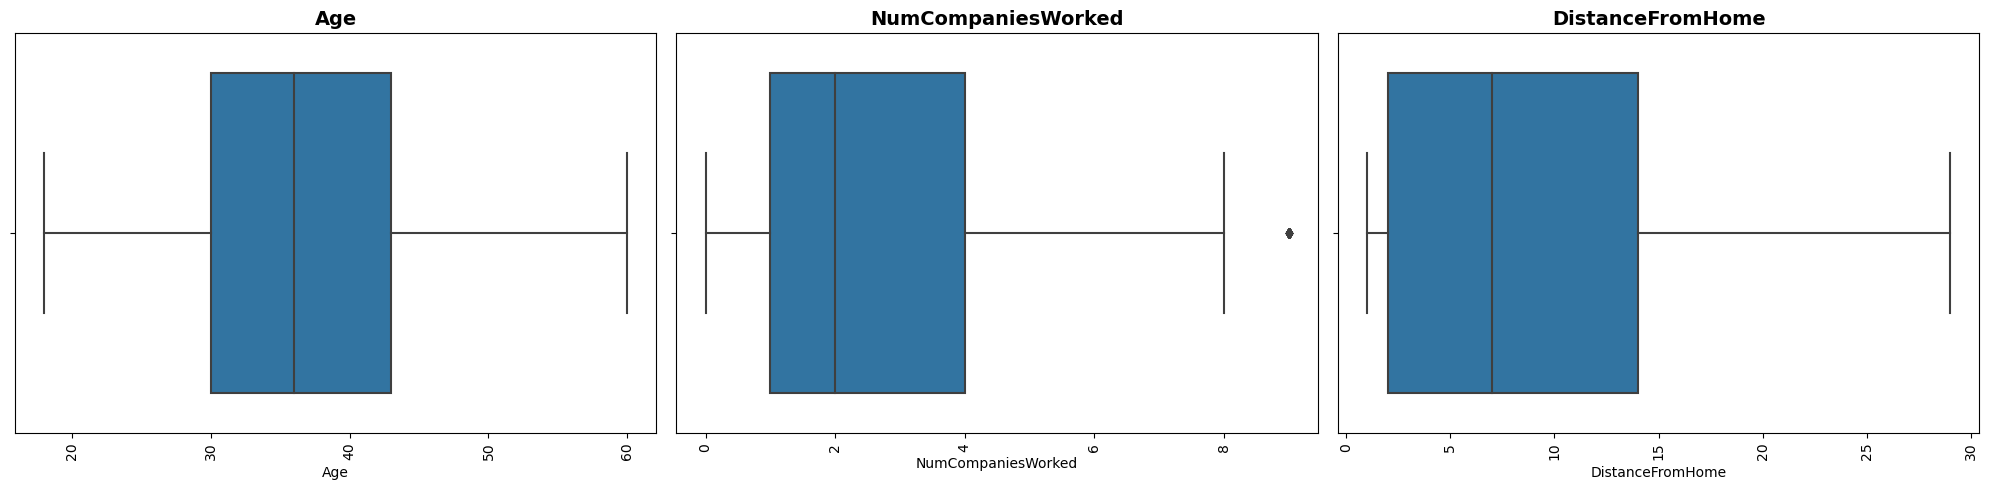

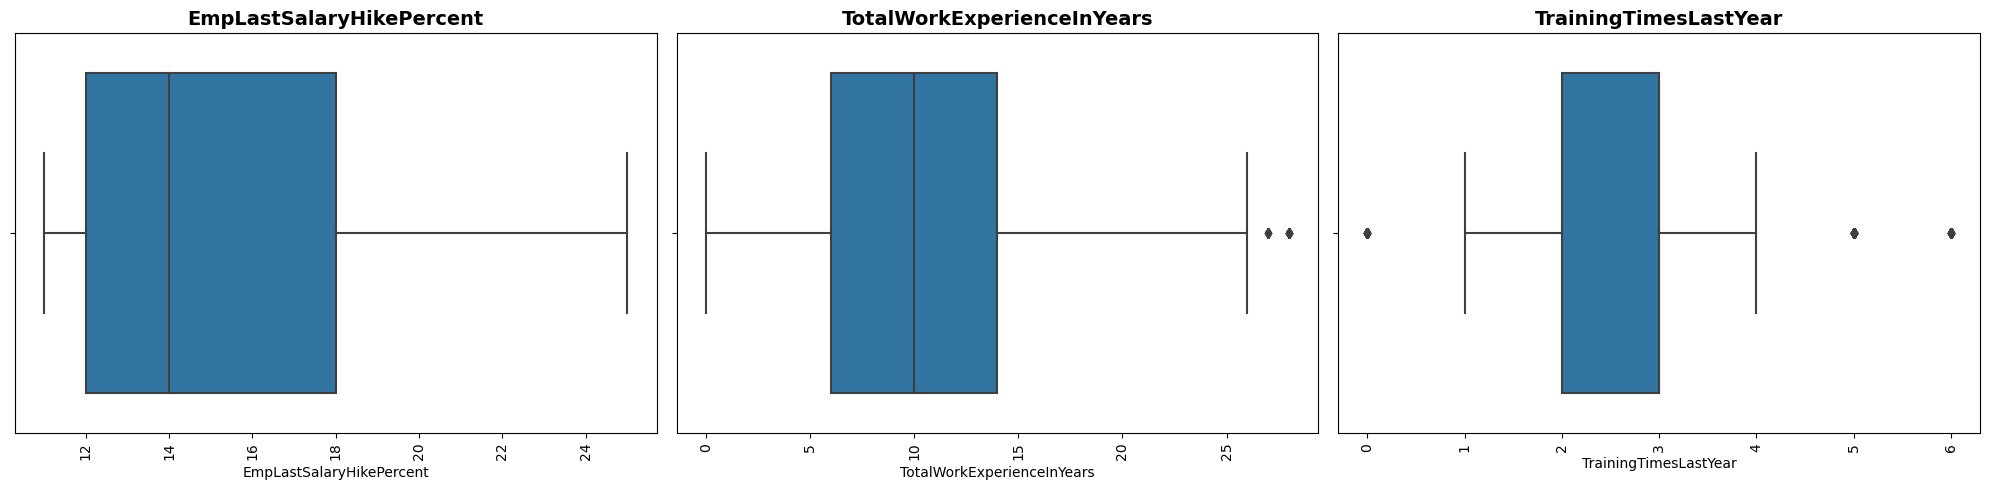

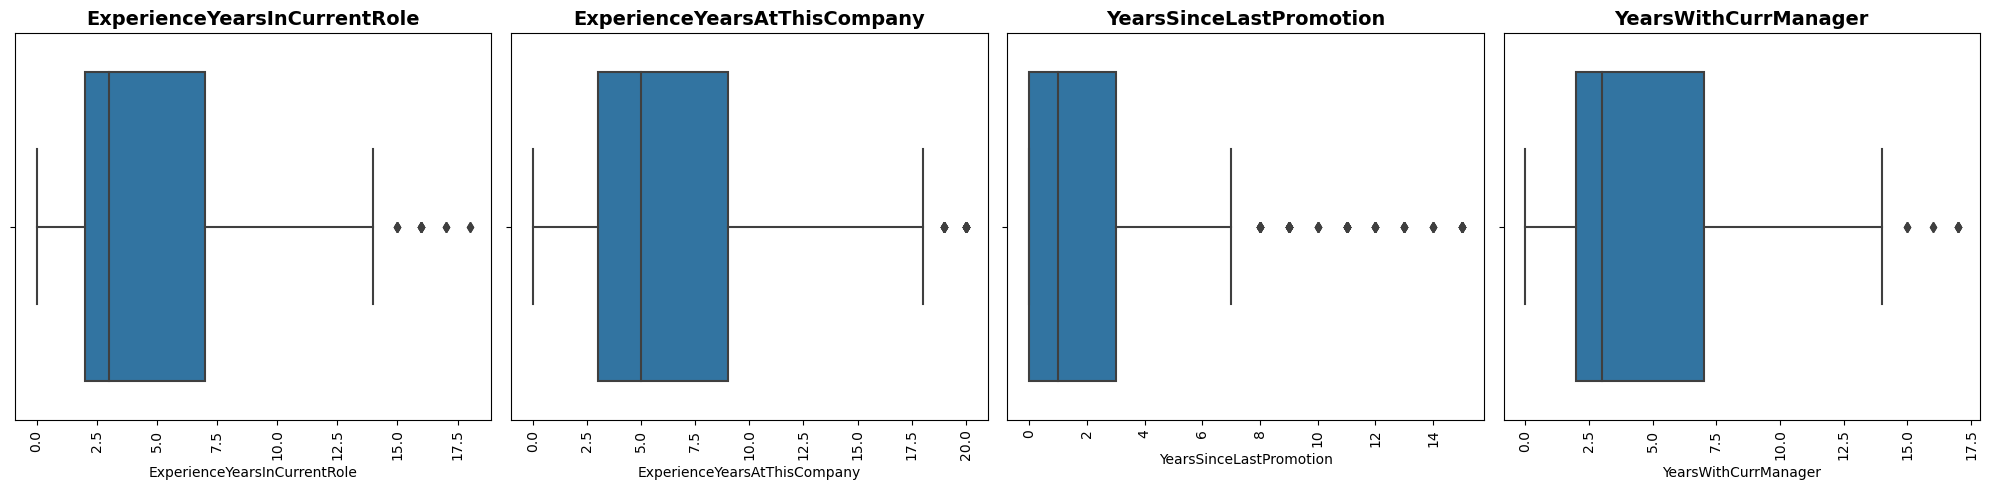

In [60]:
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 3, 1)
plt.title('Age', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["Age"])
plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 3, 2)
plt.title('NumCompaniesWorked', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["NumCompaniesWorked"])
plt.xticks(rotation=90)
plt.tight_layout()
countplt = plt.subplot(1, 3, 3)
plt.title('DistanceFromHome', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["DistanceFromHome"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 3, 1)
plt.title('EmpLastSalaryHikePercent', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["EmpLastSalaryHikePercent"])
plt.xticks(rotation=90)
plt.tight_layout()

plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 3, 2)
plt.title('TotalWorkExperienceInYears', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["TotalWorkExperienceInYears"])
plt.xticks(rotation=90)
plt.tight_layout()

countplt = plt.subplot(1, 3, 3)
plt.title('TrainingTimesLastYear', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["TrainingTimesLastYear"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 4, 1)
plt.title('ExperienceYearsInCurrentRole', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["ExperienceYearsInCurrentRole"])
plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 4, 2)
plt.title('ExperienceYearsAtThisCompany', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["ExperienceYearsAtThisCompany"])
plt.xticks(rotation=90)
plt.tight_layout()

countplt = plt.subplot(1, 4, 3)
plt.title('YearsSinceLastPromotion', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["YearsSinceLastPromotion"])
plt.xticks(rotation=90)
plt.tight_layout()
countplt = plt.subplot(1, 4, 4)
plt.title('YearsWithCurrManager', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["YearsWithCurrManager"])
plt.xticks(rotation=90)
plt.tight_layout()

* There are outliers present in our data,so lets handle it and make the data normal

* We have outliers for below features:-
TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,
YearsSinceLastPromotion,YearsWithCurrManager

**Outlier handling**

If it is normal distribution we will use impirical rule or 3 sigma rule.
if it is non normal we will use IQR for removing outliers.
For Normal distribution the skewness and kurtosis should be in the range of -1 to 1.

**Departement wise Performance**

In [21]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept=df.loc[:,['EmpDepartment','PerformanceRating']]
dept

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

In [24]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept.groupby(by='EmpDepartment').mean()

PerformanceRating
EmpDepartment                            
Data Science                     3.050000
Development                      3.085873
Finance                          2.775510
Human Resources                  2.925926
Research & Development           2.921283
Sales                            2.860590

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

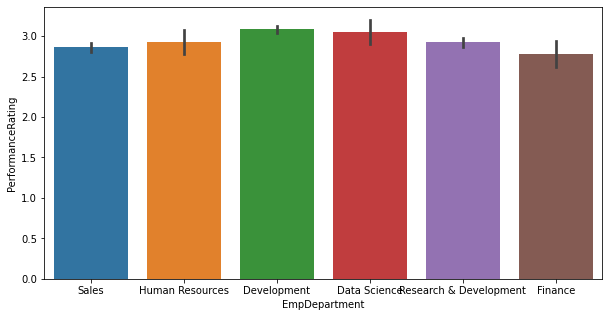

In [27]:
# departement wise performance
plt.figure(figsize=(10,5))
sns.barplot(dept.EmpDepartment,dept.PerformanceRating)

In [30]:
#analyse each department seperately
dept.groupby(by='EmpDepartment').value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
dtype: int64

In [35]:
# Creating a new dataframe to analyze each department separately
department=pd.get_dummies(dept.EmpDepartment)
performance=pd.DataFrame(df.PerformanceRating)
dept_rating=pd.concat([department,performance],axis=1)
dept_rating

Data Science  Development  Finance  Human Resources  \
0                0            0        0                0   
1                0            0        0                0   
2                0            0        0                0   
3                0            0        0                1   
4                0            0        0                0   
...            ...          ...      ...              ...   
1195             0            0        0                0   
1196             0            1        0                0   
1197             0            1        0                0   
1198             1            0        0                0   
1199             0            0        0                0   

      Research & Development  Sales  PerformanceRating  
0                          0      1                  3  
1                          0      1                  3  
2                          0      1                  4  
3                          0      0                  3  
4                          0      1                  3  
...                      ...    ...                ...  
1195                       0      1                  4  
1196                       0      0                  3  
1197                       0      0                  3  
1198                       0      0                  3  
1199                       0      1                  2  

[1200 rows x 7 columns]

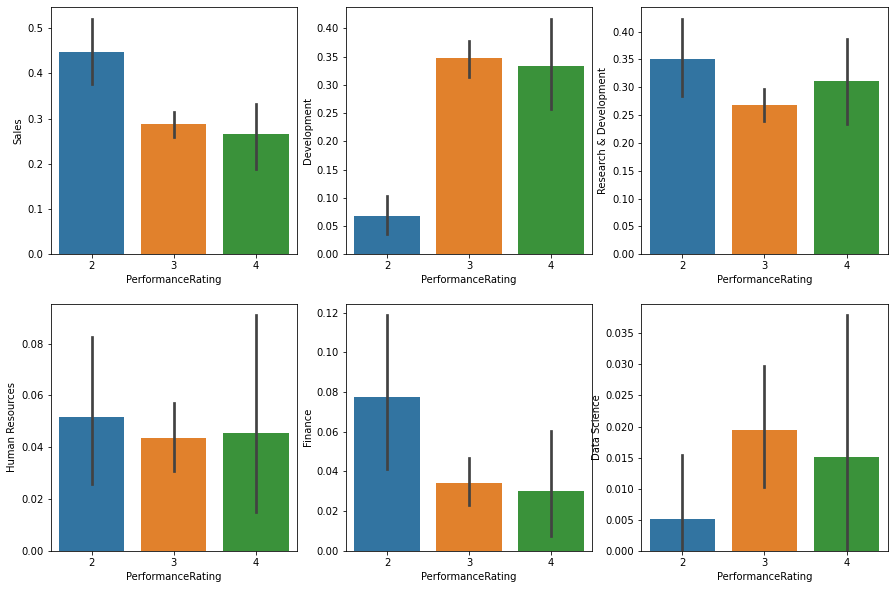

In [38]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

* From the above graph we can conclude that from EmpDepartement Development department is showing high performance rate as compared to other departement.
* After development department Research & Development department performed well.
* Sales,Human resources, data science and finance also performed well.

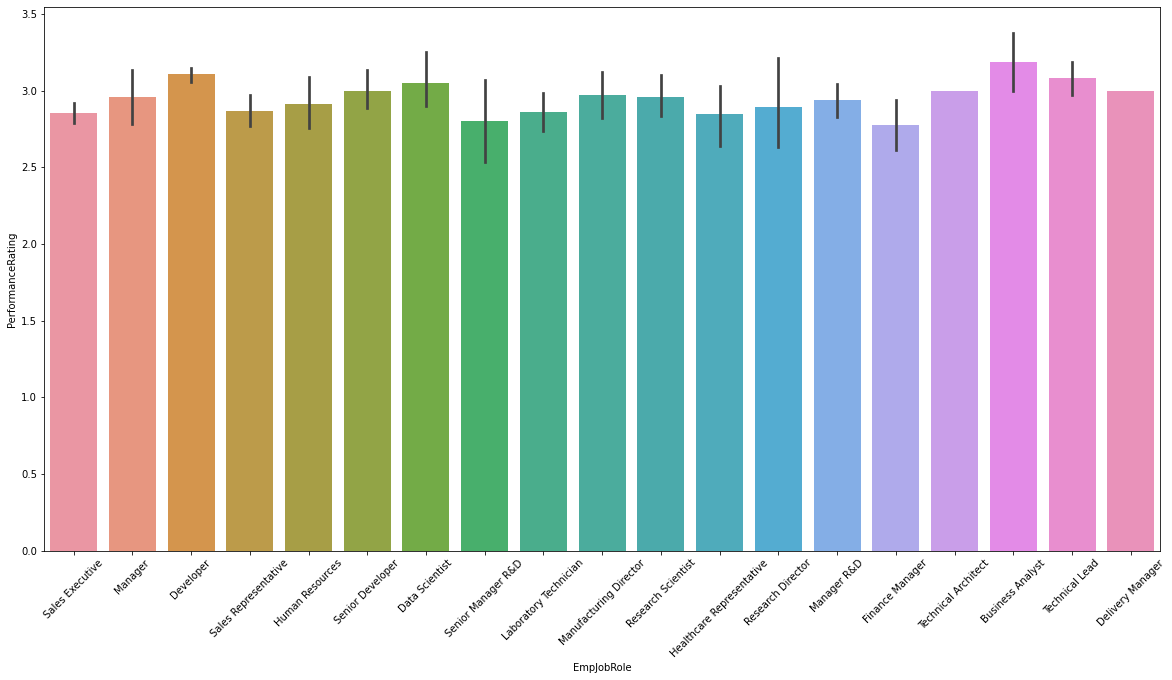

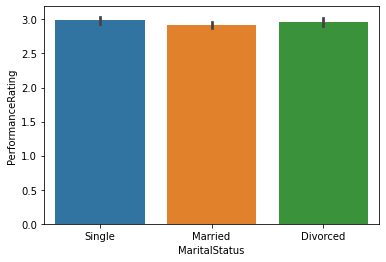

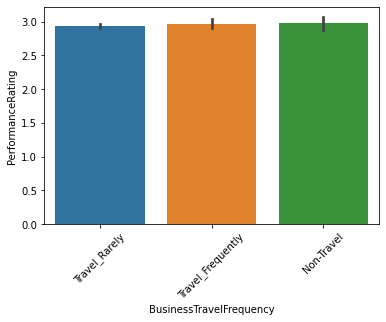

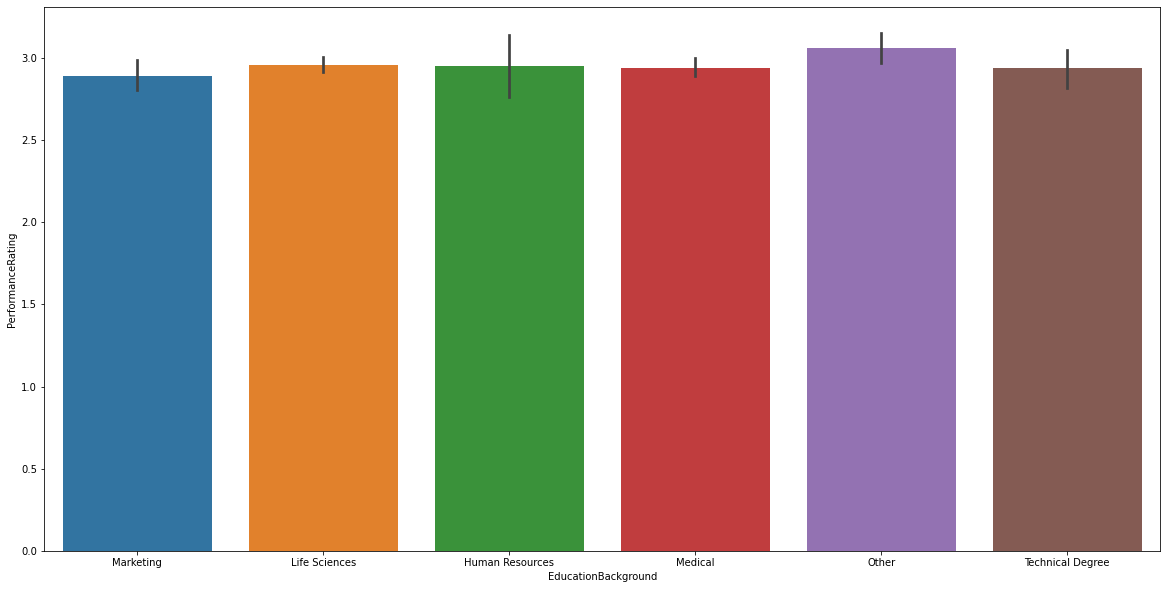

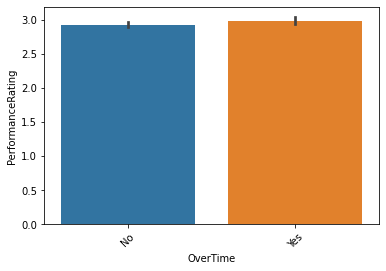

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

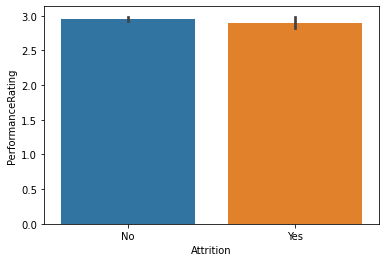

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(df.EmpJobRole,df.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(df.MaritalStatus,df.PerformanceRating)
plt.show()
sns.barplot(df.BusinessTravelFrequency,df.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(df.EducationBackground,df.PerformanceRating)
plt.show()
sns.barplot(df.OverTime,df.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(df.Attrition,df.PerformanceRating)

* Employee which are business analyst, technical lead, data scientist, developer,have performed well. Performance rating of employee does not vary with Marital status.  Employee who do overtime have rated as more as compared to those who doesn't do overtime.

<AxesSubplot:xlabel='Gender', ylabel='EmpHourlyRate'>

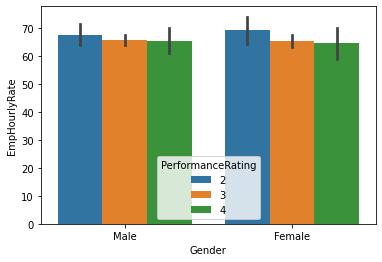

In [49]:
sns.barplot(df.Gender,df.EmpHourlyRate,hue=df.PerformanceRating)

<AxesSubplot:xlabel='Gender', ylabel='count'>

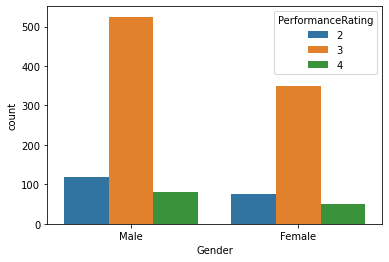

In [52]:
sns.countplot(df.Gender,hue=df.PerformanceRating)

* Employee with gender as male are rated more as compare to female employee, the reason may be there are more number of male employees than female employees in the company.

<AxesSubplot:xlabel='EducationBackground', ylabel='count'>

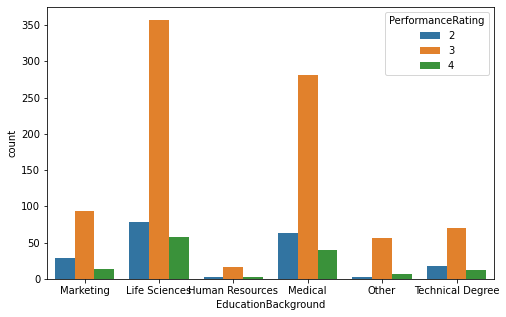

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(df.EducationBackground,hue=df.PerformanceRating)

<AxesSubplot:xlabel='EducationBackground', ylabel='Age'>

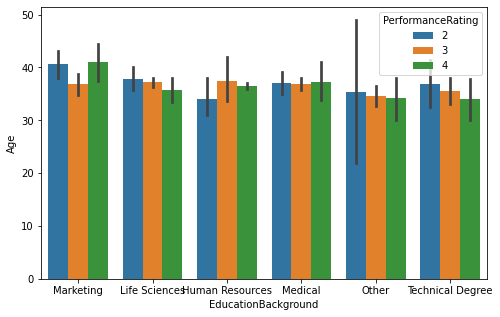

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(df.EducationBackground,df.Age,hue=df.PerformanceRating)

* Employees with education background of Life science and medical are rated more

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

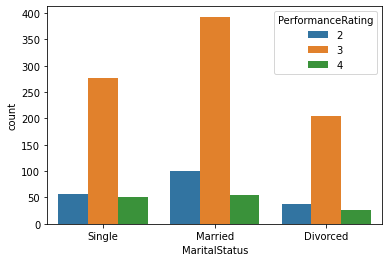

In [77]:
sns.countplot(df.MaritalStatus,hue=df.PerformanceRating)

<AxesSubplot:xlabel='EmpDepartment', ylabel='count'>

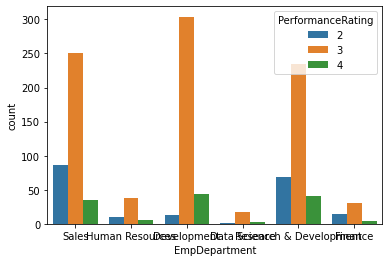

In [73]:
sns.countplot(df.EmpDepartment,hue=df.PerformanceRating)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='count'>

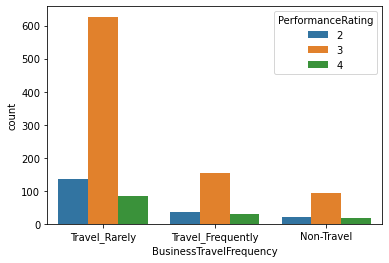

In [75]:
sns.countplot(df.BusinessTravelFrequency,hue=df.PerformanceRating)

* Employee who travel rarely are rated more as compared to those who travel frequently or who are non traveler

<AxesSubplot:xlabel='OverTime', ylabel='count'>

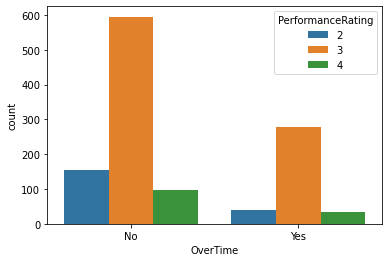

In [82]:
sns.countplot(df.OverTime,hue=df.PerformanceRating)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

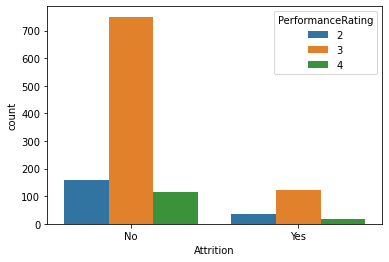

In [85]:
sns.countplot(df.Attrition,hue=df.PerformanceRating)

<AxesSubplot:xlabel='Gender', ylabel='DistanceFromHome'>

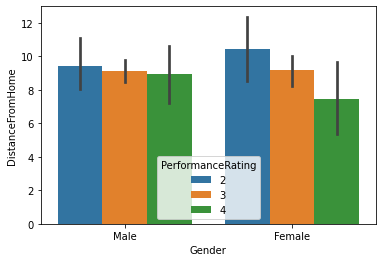

In [87]:
sns.barplot(df.Gender,df.DistanceFromHome,hue=df.PerformanceRating)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

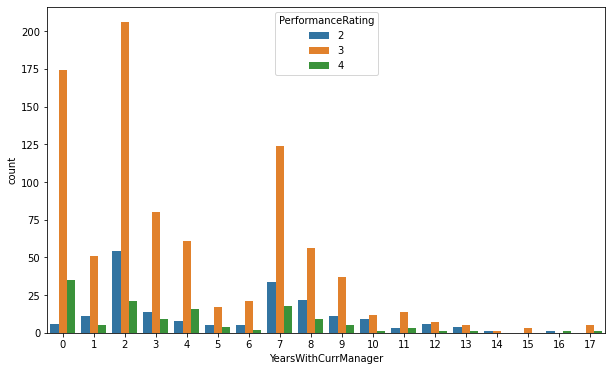

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(df.YearsWithCurrManager,hue=df.PerformanceRating)

* Performance rating of employee depends on Years with current manager.when manager is same for long duration of time the employee performace drops. So, for improving performance of employee the manager needs to shuffle atleast after every 2-3 years.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

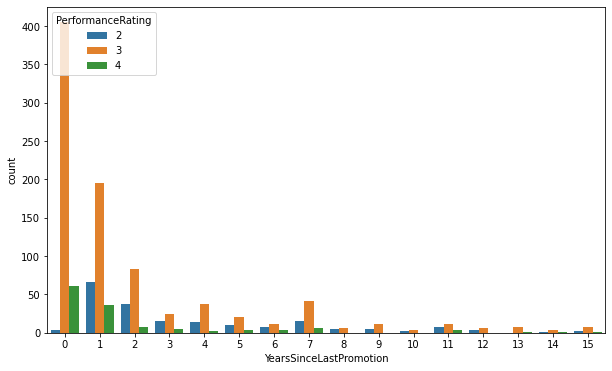

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(df.YearsSinceLastPromotion,hue=df.PerformanceRating)

* Performance rating depends on years since last promotion. when employee are not promoted since 2 to 3 years, the perfromance of employee drops. Hence to imporve performace of employee the employee should be promoted after every 1 year or at least 2 years.

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='count'>

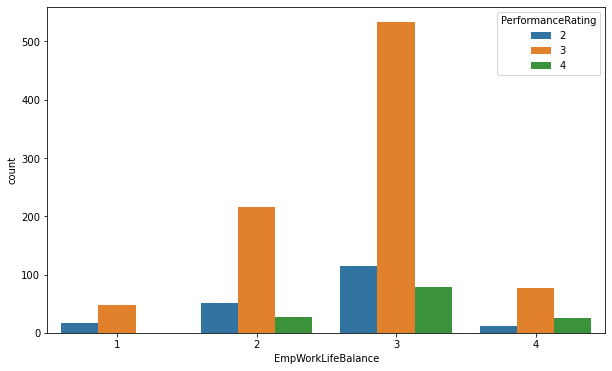

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(df.EmpWorkLifeBalance,hue=df.PerformanceRating)


* Performace of employee also depends on employee work life balance. when employee work life balance is good and are rated as 3 the performance rating of employee is also more.

<AxesSubplot:xlabel='EmpRelationshipSatisfaction', ylabel='count'>

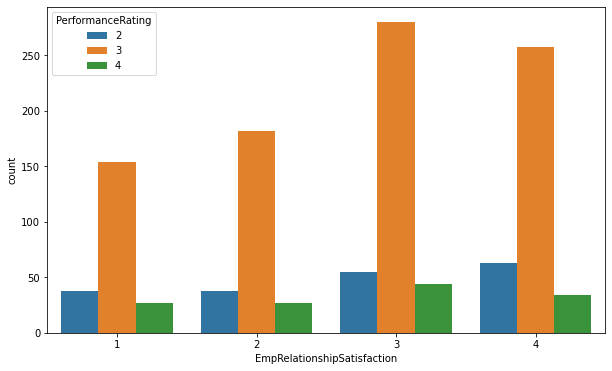

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(df.EmpRelationshipSatisfaction,hue=df.PerformanceRating)

* When employee relationship satisfaction is more the performance of employee is also more

<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='count'>

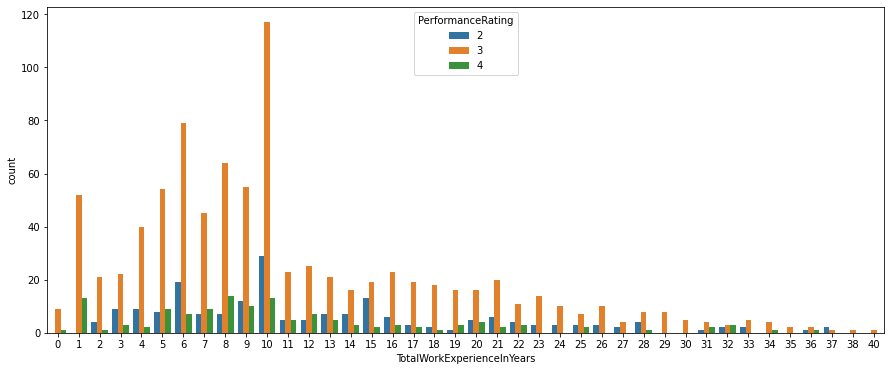

In [103]:
plt.figure(figsize=(15,6))
sns.countplot(df.TotalWorkExperienceInYears,hue=df.PerformanceRating)

* When total work experience of employee is above 10 year the performace of employee drops

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='count'>

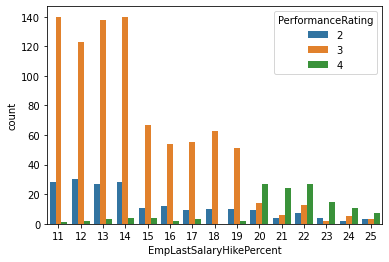

In [105]:
sns.countplot(df.EmpLastSalaryHikePercent,hue=df.PerformanceRating)

* When the employee got salary hike of more than 19%, the performce of employee increased. thus, employee performace depends on the salary hike given by the company. employee with higher salary hike percentage has performed well.

<AxesSubplot:xlabel='EmpJobLevel', ylabel='EmpEnvironmentSatisfaction'>

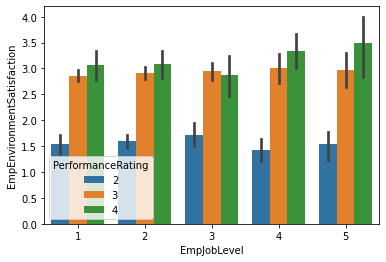

In [107]:
sns.barplot(df.EmpJobLevel,df.EmpEnvironmentSatisfaction,hue=df.PerformanceRating)

* Employee who are satisfied by environment have performed well.

<AxesSubplot:xlabel='EmpDepartment', ylabel='DistanceFromHome'>

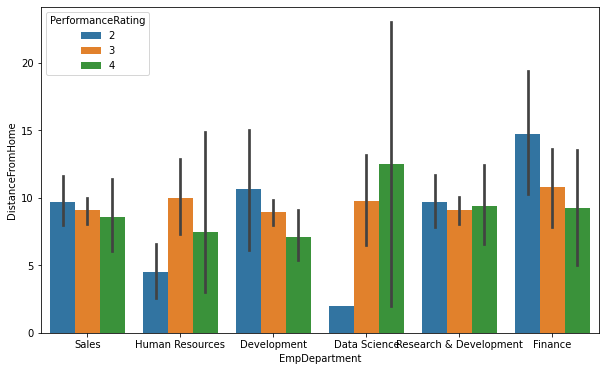

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(df.EmpDepartment,df.DistanceFromHome,hue=df.PerformanceRating)


<AxesSubplot:xlabel='EducationBackground', ylabel='EmpEducationLevel'>

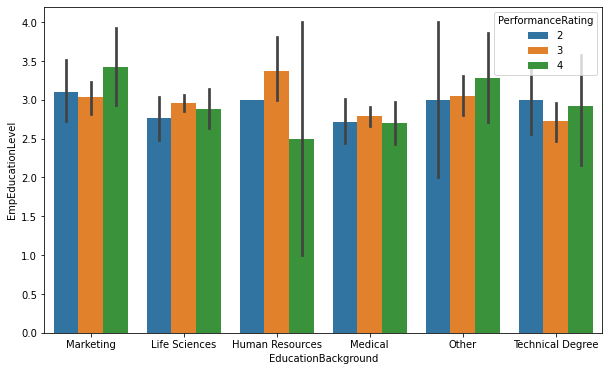

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(df.EducationBackground,df.EmpEducationLevel,hue=df.PerformanceRating)

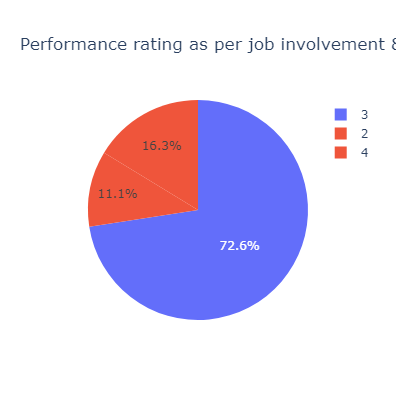

In [113]:
import plotly.express as px
fig = px.pie(df, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

* We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings

In [117]:
#Employee last salary hike percent
pd.crosstab(df['EmpLastSalaryHikePercent'],df['PerformanceRating'],margins=True)

PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

In [120]:
# 3.Employee Work life balance
pd.crosstab(df['EmpWorkLifeBalance'],df['PerformanceRating'],margins=True)

PerformanceRating     2    3    4   All
EmpWorkLifeBalance                     
1                    16   48    0    64
2                    51  216   27   294
3                   115  533   79   727
4                    12   77   26   115
All                 194  874  132  1200

In [123]:
percent = pd.crosstab(df["PerformanceRating"], df["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

* **So from the below data we got clear indication of those employees who have low performance, low job involvement and have less or equal to 2 years of experience.**

In [131]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years
low_per=df.loc[(df['PerformanceRating']==2) & (df['Attrition']=='No')& (df['EmpJobInvolvement']<= 2)& 
                 (df['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

* So, As per our Goal--2, those 6 non performing employees can be penalized or given final warning for their performance.

* **From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance.**

**Checking distribution of numerical features**

In [145]:
plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.distplot(df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

NameError: name 'numerical_feature' is not defined

<Figure size 1440x4320 with 0 Axes>

**Encoding Catagorical feature to Numerical**

In [152]:
#Encoding catagorical feature to numerical  
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i]=label.fit_transform(df.iloc[:,i])
df.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3  

[5 rows x 28 columns]

In [40]:
# Empty list to store columns with categorical data
categorical = []
for col in df.columns():
    if df[col].dtype == 'object':
        categorical.append(col)
        print (f"{col}:{df[col].unique()}")
    
# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

NameError: name 'df' is not defined

In [22]:
# Store the categorical data in a dataframe called attrition_cat
original_cat = df[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1) 

NameError: name 'df' is not defined

In [154]:
df.head(2)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  

[2 rows x 28 columns]

In [161]:
 #droping unique feature
df.drop('EmpNumber',axis=1,inplace=True) 

KeyError: "['EmpNumber'] not found in axis"

In [164]:
# finding skewness and kurtosis to check the normalization of feature.
from scipy import stats 
for column in df:
    skewness=stats.skew(df[column])
    kurtosis=stats.kurtosis(df[column])
    print(column,'skewness is',skewness)
    print(column,'kurtosis is',kurtosis)

Age skewness is 0.3836646110785685
Age kurtosis is -0.4342016798705739
Gender skewness is -0.42601432284230467
Gender kurtosis is -1.8185117967332127
EducationBackground skewness is 0.5513749427617737
EducationBackground kurtosis is -0.65174298239753
MaritalStatus skewness is -0.15144003526169916
MaritalStatus kurtosis is -1.119700089850293
EmpDepartment skewness is -0.40791122659206125
EmpDepartment kurtosis is -1.505003648253274
EmpJobRole skewness is -0.11151335264121637
EmpJobRole kurtosis is -1.25602866999997
BusinessTravelFrequency skewness is -1.4010025618647997
BusinessTravelFrequency kurtosis is 0.5486513912585655
DistanceFromHome skewness is 0.9617520027440261
DistanceFromHome kurtosis is -0.2460053857006934
EmpEducationLevel skewness is -0.2506601284752214
EmpEducationLevel kurtosis is -0.6379446256527972
EmpEnvironmentSatisfaction skewness is -0.30728009854747024
EmpEnvironmentSatisfaction kurtosis is -1.2055559189315166
EmpHourlyRate skewness is -0.03512091677629664
EmpHou

In [167]:
#checking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

NameError: name 'numerical_feature' is not defined

<Figure size 720x2880 with 0 Axes>

**TotalWorkExperienceInYears**

In [11]:
#lets take a look into the outlier data using IQR

IQR = stats.iqr(df.TotalWorkExperienceInYears, interpolation='midpoint')
print(IQR)
Q1 = df.TotalWorkExperienceInYears.quantile(0.25)
 
Q3 =df.TotalWorkExperienceInYears.quantile(0.75)

max_limit=Q3 +1.5*IQR
min_limit=Q1 - 1.5*IQR
print(min_limit)
print(max_limit)
print(df.TotalWorkExperienceInYears.median())

9.0
-7.5
28.5
10.0


In [12]:
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
17    E1001040   56       1                    3              1   
25    E1001054   52       1                    2              1   
48    E1001093   50       1                    3              1   
72    E1001129   51       0                    2              1   
77    E1001140   53       0                    2              1   
96    E1001179   53       0                    1              2   
100   E1001183   50       1                    1              0   
149   E1001275   50       1                    3              0   
173   E1001310   59       0                    1              2   
178   E1001316   52       0                    2              1   
192   E1001339   50       1                    3              1   
199   E1001352   55       1                    3              2   
277   E1001493   50       0                    3              1   
292   E1001523   54       0                    1              0   
295   E1001528   54       1                    1              1   
308   E1001556   55       1                    3              0   
312   E1001560   51       1                    1              0   
342   E1001616   56       1                    1              2   
347   E1001630   51       1                    1              0   
351   E1001638   58       0                    3              1   
356   E1001645   51       0                    5              2   
361   E1001651   56       1                    1              1   
387   E1001700   54       0                    3              2   
388   E1001701   58       0                    3              1   
424   E1001762   49       1                    1              0   
450   E1001817   50       1                    3              2   
471   E1001850   53       0                    5              1   
475   E1001856   55       1                    2              1   
490   E1001884   50       1                    3              1   
525   E1001939   49       0                    1              1   
528   E1001943   54       0                    3              1   
589   E1002048   55       1                    3              1   
615   E1002102   58       1                    3              0   
642   E1002145   48       1                    1              1   
678   E1002216   58       0                    1              1   
703   E1002251   55       1                    0              1   
777    E100301   53       0                    1              1   
816    E100358   50       0                    3              0   
845    E100409   58       1                    3              2   
867    E100443   58       0                    3              1   
921    E100537   52       1                    1              1   
958    E100601   50       0                    3              0   
962    E100607   52       1                    1              2   
989    E100652   55       1                    3              2   
1077   E100783   55       0                    1              2   
1101   E100824   52       0                    1              1   
1104   E100827   60       0                    1              1   
1116   E100846   57       1                    2              0   
1135   E100875   55       0                    1              2   
1156   E100916   49       1                    1              0   
1160   E100922   50       1                    3              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
17                1           3                        1                 9   
25                5           8                        1                 3   
48                1           3                        1                 2   
72                5           8                        1                26   
77                5          13                        1                 7   
96                1           3                     

In [13]:
#The outlier is less than 5% so lets deal with it
#lets use median to handle the outlier
#total outlier datapoints are below 5%,so lets handle this by imputing 
df.TotalWorkExperienceInYears.loc[df.TotalWorkExperienceInYears > max_limit]=10

In [177]:
# TotalWorkExperienceInYears is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=df.TotalWorkExperienceInYears.mean() - 3*df.TotalWorkExperienceInYears.std()##calculating lower limit
print(lower_limit)

upper_limit=df.TotalWorkExperienceInYears.mean() + 3*df.TotalWorkExperienceInYears.std()#calculating upper limit
print(upper_limit)
df.loc[df['TotalWorkExperienceInYears']<lower_limit]#checking values which are less than minimum limit
df.loc[df['TotalWorkExperienceInYears']>upper_limit]#checking values which are greater than maximum limit
display(len(df.loc[df['TotalWorkExperienceInYears']>upper_limit])/1200) #checking percent of outliers
df.loc[df['TotalWorkExperienceInYears']>upper_limit,'TotalWorkExperienceInYears']=np.mean(df.TotalWorkExperienceInYears) #imputing value with mean as outliers percentage are less than 5%
display(df.loc[df['TotalWorkExperienceInYears']>upper_limit]) #reckeck

-12.061683901117005
34.721683901117004


0.009166666666666667

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

**ExperienceYearsAtThisCompany**

In [14]:
IQR = stats.iqr(df.ExperienceYearsAtThisCompany, interpolation='midpoint')
print(IQR)
Q1 = df.ExperienceYearsAtThisCompany.quantile(0.25)
 
Q3 =df.ExperienceYearsAtThisCompany.quantile(0.75)

max_limit=Q3 +1.5*IQR
min_limit=Q1 - 1.5*IQR
print(min_limit)
print(max_limit)
print(df.ExperienceYearsAtThisCompany.median())

7.0
-7.5
20.5
5.0


In [15]:
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3     E1001009   41       1                    0              0   
11    E1001024   47       0                    3              0   
25    E1001054   52       1                    2              1   
52    E1001098   47       0                    4              1   
100   E1001183   50       1                    1              0   
168   E1001304   39       0                    1              1   
175   E1001313   41       0                    1              0   
178   E1001316   52       0                    2              1   
181   E1001321   39       0                    3              2   
216   E1001387   42       1                    3              1   
252   E1001445   42       1                    1              2   
272   E1001482   46       0                    2              1   
304   E1001545   44       1                    2              1   
307   E1001555   45       0                    2              2   
308   E1001556   55       1                    3              0   
312   E1001560   51       1                    1              0   
316   E1001566   44       1                    1              0   
320   E1001571   43       0                    2              2   
347   E1001630   51       1                    1              0   
450   E1001817   50       1                    3              2   
459   E1001828   40       1                    3              2   
471   E1001850   53       0                    5              1   
475   E1001856   55       1                    2              1   
490   E1001884   50       1                    3              1   
492   E1001886   44       0                    3              0   
555   E1001990   45       1                    1              1   
557   E1001997   45       0                    5              2   
571   E1002018   40       1                    3              2   
613   E1002093   41       0                    2              0   
617   E1002105   47       0                    1              0   
642   E1002145   48       1                    1              1   
658   E1002178   48       0                    3              0   
777    E100301   53       0                    1              1   
785    E100314   44       0                    3              1   
816    E100358   50       0                    3              0   
817    E100359   59       0                    1              2   
838    E100397   40       1                    1              1   
845    E100409   58       1                    3              2   
862    E100436   43       1                    1              1   
867    E100443   58       0                    3              1   
911    E100522   46       0                    2              0   
921    E100537   52       1                    1              1   
956    E100597   42       1                    5              1   
962    E100607   52       1                    1              2   
978    E100630   40       1                    3              0   
989    E100652   55       1                    3              2   
1015   E100688   41       1                    1              2   
1024   E100703   45       1                    1              0   
1027   E100707   39       1                    3              1   
1036   E100722   39       1                    3              1   
1086   E100798   43       1                    1              0   
1094   E100809   39       1                    1              0   
1104   E100827   60       0                    1              1   
1117   E100847   50       1                    1              1   
1156   E100916   49       1                    1              0   
1160   E100922   50       1                    3              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 3           8                        1                10   
11                5          

In [16]:
#The outlier is less than 5% so lets deal with it
#lets use median to handle the outlier
#total outlier datapoints are below 5%,so lets handle this by imputing 
df.ExperienceYearsAtThisCompany.loc[df.ExperienceYearsAtThisCompany > max_limit]=5

In [180]:
# ExperienceYearsAtThisCompany is not normally distributed hence we use IQR rule to remove outliers
from scipy import stats
IQR = stats.iqr(df.ExperienceYearsAtThisCompany, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=df.ExperienceYearsAtThisCompany.quantile(0.25)#defining 25% of data
Q3=df.ExperienceYearsAtThisCompany.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(df.loc[df['ExperienceYearsAtThisCompany']<min_limit]) #checking values which are less than minimum limit
display(df.loc[df['ExperienceYearsAtThisCompany']>max_limit])#checking values which are greater than maximum limit
display(len(df.loc[df['ExperienceYearsAtThisCompany']>max_limit])/18278)
#imputing outlier with with median
df.loc[df['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(df.ExperienceYearsAtThisCompany)
df.loc[df['ExperienceYearsAtThisCompany']>max_limit] #checking whether outlier remove or not

7.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

0.003063792537476748

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

**YearsSinceLastPromotion**

In [12]:
IQR = stats.iqr(df.YearsSinceLastPromotion, interpolation='midpoint')
print(IQR)
Q1 = df.YearsSinceLastPromotion.quantile(0.25)
 
Q3 =df.YearsSinceLastPromotion.quantile(0.75)

max_limit1=Q3 +1.5*IQR
min_limit1=Q1 - 1.5*IQR
print(min_limit1)
print(max_limit1)

3.0
-4.5
7.5


In [14]:
df.loc[df['YearsSinceLastPromotion'] > max_limit1]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3     E1001009   41       1                    0              0   
11    E1001024   47       0                    3              0   
100   E1001183   50       1                    1              0   
130   E1001239   31       0                    3              1   
132   E1001248   37       1                    1              1   
...        ...  ...     ...                  ...            ...   
1152   E100903   41       0                    1              1   
1160   E100922   50       1                    3              1   
1181   E100961   34       1                    1              1   
1185   E100969   35       1                    1              2   
1189   E100980   33       1                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 3           8                        1                10   
11                5          13                        2                 3   
100               1           3                        0                 2   
130               1           3                        1                12   
132               5          13                        1                 1   
...             ...         ...                      ...               ...   
1152              5           8                        1                 2   
1160              3           8                        2                 3   
1181              1          15                        1                 1   
1185              1          15                        1                 6   
1189              1          15                        2                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
3                     4  ...                            2   
11                    3  ...                            4   
100                   4  ...                            4   
130                   3  ...                            3   
132                   4  ...                            3   
...                 ...  ...                          ...   
1152                  5  ...                            2   
1160                  3  ...                            3   
1181                  5  ...                            4   
1185                  4  ...                            2   
1189                  3  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
3                             23                      2                   2   
11                            28                      2                   2   
100                           31                      3                   3   
130                           10                      2                   1   
132                           17                      2                   1   
...                          ...                    ...                 ...   
1152                          22                      2                   3   
1160                          32                      2                   3   
1181                          10                      4                   2   
1185                          17                      3                   3   
1189                          10                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
3                               21                             6   
11                              22                             2   
100                             31                             6   
130                              9                             7   
132                             14                             1   
...                            ...                           ...   
1152                            18                            16   
1160                            32   

* The outliers in YearsSinceLastPromotion is more than 5% so we are not handling this

In [186]:
# YearsSinceLastPromotion is not normally distributed hence we use IQR rule to remove outliers
IQR = stats.iqr(df.YearsSinceLastPromotion, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=df.YearsSinceLastPromotion.quantile(0.25)#defining 25% of data
Q3=df.YearsSinceLastPromotion.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(df.loc[df['YearsSinceLastPromotion']<min_limit]) #checking values which are less than minimum limit
display(df.loc[df['YearsSinceLastPromotion']>max_limit])#checking values which are greater than maximum limit
display(len(df.loc[df['YearsSinceLastPromotion']>max_limit])/18278)
#imputing outlier with with median
data.loc[df['YearsSinceLastPromotion']>max_limit,'YearsSinceLastPromotion']=np.median(df.YearsSinceLastPromotion)
data.loc[df['YearsSinceLastPromotion']>max_limit] #checking whether outlier remove or not

3.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
3                     4                           2  ...   
11                    3                           4  ...   
100                   4                           1  ...   
130                   3                           4  ...   
132                   4                           1  ...   
...                 ...                         ...  ...   
1152                  5                           2  ...   
1160                  3                           1  ...   
1181                  5                           2  ...   
1185                  4                           2  ...   
1189                  3                           1  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
3                               2                        23.0   
11                              4                        28.0   
100                             4                        31.0   
130                             3                        10.0   
132                             3                        17.0   
...                           ...                         ...   
1152                            2                        22.0   
1160                            3                        32.0   
1181                            4                        10.0   
1185                            2                        17.0   
1189                            1                        10.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
3                         2                   2                             5   
11                        2                   2                             5   
100                       3                   3                             5   
130                       2                   1                             9   
132                       2                   1                            14   
...                     ...                 ...                           ...   
1152                      2                   3                            18   
1160                      2                   3                             5   
1181                      4                   2                            10   
1185                      3                   3                         

0.004814531130320604

NameError: name 'data' is not defined

**Years Exoereience in the current role**

In [19]:
IQR3 = stats.iqr(df.ExperienceYearsInCurrentRole, interpolation='midpoint')
print(IQR3)
Q1 = df.ExperienceYearsInCurrentRole.quantile(0.25)
 
Q3 =df.ExperienceYearsInCurrentRole.quantile(0.75)

max_limit2=Q3 +1.5*IQR
min_limit2=Q1 - 1.5*IQR
print(min_limit2)
print(max_limit2)
print(df.ExperienceYearsInCurrentRole.median())

5.0
-2.5
11.5
3.0


In [20]:
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit2]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
2     E1001007   40       1                    1              1   
52    E1001098   47       0                    4              1   
76    E1001135   36       1                    1              1   
123   E1001228   38       0                    5              1   
126   E1001235   41       1                    3              2   
137   E1001259   53       1                    3              0   
151   E1001277   41       1                    3              0   
175   E1001313   41       0                    1              0   
178   E1001316   52       0                    2              1   
203   E1001358   46       0                    1              0   
272   E1001482   46       0                    2              1   
321   E1001572   36       0                    1              2   
361   E1001651   56       1                    1              1   
445   E1001805   46       0                    1              1   
458   E1001827   33       1                    1              1   
501   E1001899   35       1                    1              1   
555   E1001990   45       1                    1              1   
592   E1002052   34       1                    1              0   
613   E1002093   41       0                    2              0   
639   E1002141   46       0                    5              0   
658   E1002178   48       0                    3              0   
716   E1002271   47       1                    3              2   
717   E1002273   38       1                    1              1   
730   E1002293   38       0                    3              1   
739   E1002304   56       1                    1              0   
744   E1002314   36       1                    2              0   
782    E100310   53       0                    4              0   
809    E100351   33       0                    1              2   
817    E100359   59       0                    1              2   
818    E100361   36       0                    5              0   
828    E100378   35       1                    2              2   
849    E100416   34       0                    4              2   
862    E100436   43       1                    1              1   
864    E100440   51       1                    1              2   
911    E100522   46       0                    2              0   
921    E100537   52       1                    1              1   
956    E100597   42       1                    5              1   
960    E100605   43       0                    2              1   
999    E100665   42       1                    1              1   
1001   E100669   37       0                    1              2   
1031   E100714   32       0                    5              1   
1109   E100836   40       0                    1              1   
1152   E100903   41       0                    1              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
2                 5          13                        2                 5   
52                1           3                        1                 2   
76                5          13                        1                 1   
123               1          15                        1                 1   
126               1           3                        1                 6   
137               5           8                        1                 2   
151               1           3                        2                 9   
175               4          11                        0                 7   
178               5           8                        1                 2   
203               4          16                        1                 8   
272               5           8                        1                 2   
321               4          10                        1                 2   
361               4           9           

In [183]:
# ExperienceYearsInCurrentRole is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=df.ExperienceYearsInCurrentRole.mean() - 3*df.ExperienceYearsInCurrentRole.std()##calculating lower limit
display(lower_limit)

upper_limit=df.ExperienceYearsInCurrentRole.mean() + 3*df.ExperienceYearsInCurrentRole.std()#calculating upper limit
display(upper_limit)
display(df.loc[df['ExperienceYearsInCurrentRole']<lower_limit])#checking values which are less than minimum limit
display(df.loc[df['ExperienceYearsInCurrentRole']>upper_limit])#checking values which are greater than maximum limit
display(len(df.loc[df['ExperienceYearsInCurrentRole']>upper_limit])/1200) #checking percent of outliers
data.loc[df['ExperienceYearsInCurrentRole']>upper_limit,'ExperienceYearsInCurrentRole']=np.mean(df.ExperienceYearsInCurrentRole) #imputing value with mean as outliers percentage are less than 5%
display(df.loc[df['ExperienceYearsInCurrentRole']>upper_limit]) #reckeck

-6.5495656709798675

15.132899004313202

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
151    41       1                    3              0              1   
175    41       0                    1              0              4   
361    56       1                    1              1              4   
639    46       0                    5              0              5   
658    48       0                    3              0              4   
730    38       0                    3              1              4   
817    59       0                    1              2              5   
864    51       1                    1              2              1   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
999    42       1                    1              1              5   
1152   41       0                    1              1              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151            3                        1                 9   
175           11                        0                 7   
361            9                        2                23   
639           13                        2                 3   
658            8                        1                22   
730           11                        2                10   
817           13                        2                25   
864            3                        2                 6   
921            3                        2                 1   
956            3                        2                 4   
999           13                        2                 1   
1152           8                        2                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
151                   3                           1  ...   
175                   1                           2  ...   
361                   3                           4  ...   
639                   3                           1  ...   
658                   3                           4  ...   
730                   3                           2  ...   
817                   3                           1  ...   
864                   3                           1  ...   
921                   4                           3  ...   
956                   2                           3  ...   
999                   1                           2  ...   
1152                  5                           2  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
151                             2                        21.0   
175                             2                        21.0   
361                             1                        33.0   
639                             4                        25.0   
658                             2                        24.0   
730                             1                        20.0   
817                             4                        28.0   
864                             3                        23.0   
921                             1                        34.0   
956                             4                        22.0   
999                             3                        20.0   
1152                            2                        22.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
151                       2                   4                            18   
175                       3                   3                             5   
361                       0                   3                            19   
639                       5                   3                            19   
658                       3                   3                             5   
730                       3                   3                            18   
817                       3                   2        

0.01

NameError: name 'data' is not defined

In [21]:
#lets use Quantile based flooring and capping
# In this technique, the outlier is capped at a certain value above the 90th percentile value .
print("90th quantile : ", np.quantile(df.ExperienceYearsInCurrentRole, .90))

90th quantile :  9.0


In [22]:

df.ExperienceYearsInCurrentRole.loc[df.ExperienceYearsInCurrentRole > max_limit]=9

**Years with current manager**

In [23]:
IQR3 = stats.iqr(df.YearsWithCurrManager, interpolation='midpoint')
print(IQR3)
Q1 = df.YearsWithCurrManager.quantile(0.25)
 
Q3 =df.YearsWithCurrManager.quantile(0.75)

max_limit3=Q3 +1.5*IQR
min_limit3=Q1 - 1.5*IQR
print(min_limit3)
print(max_limit3)
print(df.YearsWithCurrManager.median())

5.0
-2.5
11.5
3.0


In [189]:
# YearsWithCurrManager is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=df.YearsWithCurrManager.mean() - 3*df.YearsWithCurrManager.std()##calculating lower limit
print(lower_limit)

upper_limit=df.YearsWithCurrManager.mean() + 3*df.YearsWithCurrManager.std()#calculating upper limit
print(upper_limit)
display(df.loc[df['YearsWithCurrManager']<lower_limit])#checking values which are less than minimum limit
display(df.loc[df['YearsWithCurrManager']>upper_limit])#checking values which are greater than maximum limit
display(len(df.loc[df['YearsWithCurrManager']>upper_limit])/1200) #checking percent of outliers
data.loc[df['YearsWithCurrManager']>upper_limit,'YearsWithCurrManager']=np.mean(df.YearsWithCurrManager) #imputing value with mean as outliers percentage are less than 5%
display(df.loc[df['YearsWithCurrManager']>upper_limit]) #reckeck

-6.519728029684055
14.729728029684056


Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
25     52       1                    2              1              5   
72     51       0                    2              1              5   
126    41       1                    3              2              1   
283    44       1                    4              2              4   
320    43       0                    2              2              5   
655    40       1                    1              0              4   
785    44       0                    3              1              1   
864    51       1                    1              2              1   
888    45       1                    1              0              1   
956    42       1                    5              1              1   
1083   37       0                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25             8                        2                 3   
72             8                        2                26   
126            3                        2                 6   
283           12                        2                29   
320           13                        2                 4   
655            9                        2                 1   
785            3                        2                 7   
864            3                        2                 6   
888            3                        2                 9   
956            3                        2                 4   
1083           2                        2                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
25                    4                           3  ...   
72                    4                           1  ...   
126                   3                           4  ...   
283                   4                           4  ...   
320                   4                           4  ...   
655                   4                           1  ...   
785                   4                           1  ...   
864                   3                           1  ...   
888                   3                           2  ...   
956                   2                           3  ...   
1083                  3                           4  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
25                              1                        34.0   
72                              3                        29.0   
126                             3                        20.0   
283                             2                        20.0   
320                             4                        23.0   
655                             1                        22.0   
785                             4                        24.0   
864                             3                        23.0   
888                             3                        20.0   
956                             4                        22.0   
1083                            3                        18.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
25                        3                   4                             5   
72                        2                   2                            20   
126                       3                   3                            18   
283                       3                   3                            20   
320                       3                   4                             5   
655                       3                   3                            19   
785                       4                   3                             5   
864                       5                   3                            20   
888                       2                   1                            17   
956                       3                   3                         

0.009166666666666667

NameError: name 'data' is not defined

In [24]:
df[df['YearsWithCurrManager'] > max_limit3].shape

(37, 28)

In [25]:
#lets use Quantile based flooring and capping
# In this technique, the outlier is capped at a certain value above the 90th percentile value .
print("90th quantile : ", np.quantile(df.YearsWithCurrManager, .90))

90th quantile :  9.0


In [26]:

df.YearsWithCurrManager.loc[df.YearsWithCurrManager > max_limit]=9

In [27]:
#Rest of the columns have very less outliers and columns are not using for model creation

In [28]:
#lets check for duplicate rows
df.duplicated().sum()

0

In [29]:
df.describe()#check for std =0 

Age       Gender  EducationBackground  MaritalStatus  \
count  1200.000000  1200.000000           1200.00000    1200.000000   
mean     36.918333     0.604167              2.23500       1.096667   
std       9.087289     0.489233              1.31004       0.731050   
min      18.000000     0.000000              0.00000       0.000000   
25%      30.000000     0.000000              1.00000       1.000000   
50%      36.000000     1.000000              2.00000       1.000000   
75%      43.000000     1.000000              3.00000       2.000000   
max      60.000000     1.000000              5.00000       2.000000   

       EmpDepartment   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
count    1200.000000  1200.000000               1200.00000       1200.000000   
mean        3.215000     9.039167                  1.07500          9.165833   
std         1.696911     4.754451                  0.53816          8.176636   
min         0.000000     0.000000                  0.00000          1.000000   
25%         1.000000     4.000000                  1.00000          2.000000   
50%         4.000000     9.000000                  1.00000          7.000000   
75%         5.000000    13.000000                  1.00000         14.000000   
max         5.000000    18.000000                  2.00000         29.000000   

       EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
count         1200.00000                 1200.000000  ...   
mean             2.89250                    2.715833  ...   
std              1.04412                    1.090599  ...   
min              1.00000                    1.000000  ...   
25%              2.00000                    2.000000  ...   
50%              3.00000                    3.000000  ...   
75%              4.00000                    4.000000  ...   
max              5.00000                    4.000000  ...   

       EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
count                  1200.000000                 1200.000000   
mean                      2.725000                   10.372500   
std                       1.075642                    6.366385   
min                       1.000000                    0.000000   
25%                       2.000000                    6.000000   
50%                       3.000000                   10.000000   
75%                       4.000000                   14.000000   
max                       4.000000                   28.000000   

       TrainingTimesLastYear  EmpWorkLifeBalance  \
count            1200.000000         1200.000000   
mean                2.785833            2.744167   
std                 1.263446            0.699374   
min                 0.000000            1.000000   
25%                 2.000000            2.000000   
50%                 3.000000            3.000000   
75%                 3.000000            3.000000   
max                 6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       6.100000                      4.291667   
std                        4.493532                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                        9.000000                      7.000000   
max                       20.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  \
count              1200.000000           1200.000000  1200.000000   
mean                  2.194167              4.105000     0.148333   
std                   3.221560              3.541576     0.355578   
min                   0.000000              0.000000     0.000000   
25%                   0.000000              2.000000     0.000000   
50% 

**Feature transformation**

In YearsSinceLastPromotion some skewed & kurtosis is present, so we used Square Root Transformation techinque.

Square root transformation: Square root transformation is one of the many types of standard transformations.This transformation is used for count data (data that follow a Poisson distribution) or small whole numbers. Each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.

In [196]:
df['square_YearsSinceLastPromotion'] = df.YearsSinceLastPromotion**(1/2)

* Some features have high range of value than other features, so we will scale the data using normalization.

In [201]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scale.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])
df.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  TotalWorkExperienceInYears  \
0                           4  ...                   -0.148321   
1                           4  ...                    1.202479   
2                           4  ...                    1.202479   
3                           2  ...                    1.607719   
4                           1  ...                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.749766                        0   
1                      0.749766                        1   
2                      2.410786                        1   
3                      0.472929                       12   
4                     -0.634417                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.100251          0                  3   
1              0.817773          0                  3   
2              2.230163          0                  4   
3              0.535296          0                  3   
4             -0.594616          0                  3   

   square_YearsSinceLastPromotion  
0                       -0.995673  
1                       -0.043007  
2                       -0.043007  
3                        2.304459  
4                        0.351600  

[5 rows x 28 columns]

**Creating new features from Numerical data**

In [ ]:
# Store the numerical features to a dataframe attrition_num
original_num = original_data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating 

In [ ]:
# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)
original_final.head(3)

### FEATURE SELECTION

There are lot of features in our dataset, to extract important features which really contribute to target feature we need to find corelation coefficient. Corelation coefficient is used to find out the important features in dataset and these features are then used to train the model.
From there, we also get the top factors which affect performance. We can see that the most important features selected were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1.
Standardization and Label Encoding was also used for feature transformation.
From below corelations we can conclude that top 3 Important Factors affecting employee performance are-
Employee EnvironmentSatisfaction,
Employee Last Salary Hike Percent and
EmpWorkLifeBalance

In [206]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.corr()

Age    Gender  EducationBackground  \
Age                             1.000000 -0.040107            -0.055905   
Gender                         -0.040107  1.000000             0.009922   
EducationBackground            -0.055905  0.009922             1.000000   
MaritalStatus                  -0.098368 -0.042169            -0.001097   
EmpDepartment                  -0.000104 -0.010925            -0.026874   
EmpJobRole                     -0.037665  0.011332            -0.012325   
BusinessTravelFrequency         0.040579 -0.043608             0.012382   
DistanceFromHome                0.020937 -0.001507            -0.013919   
EmpEducationLevel               0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction      0.013814  0.000033             0.045028   
EmpHourlyRate                   0.062867  0.002218            -0.030234   
EmpJobInvolvement               0.027216  0.010949            -0.025505   
EmpJobLevel                     0.509139 -0.050685            -0.056338   
EmpJobSatisfaction             -0.002436  0.024680            -0.030977   
NumCompaniesWorked              0.284408 -0.036675            -0.032879   
OverTime                        0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent       -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction     0.049749  0.030707             0.005652   
TotalWorkExperienceInYears      0.652349 -0.066007            -0.024554   
TrainingTimesLastYear          -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance             -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany    0.176752 -0.053683             0.006914   
ExperienceYearsInCurrentRole    0.217163 -0.031823            -0.003215   
YearsSinceLastPromotion         0.228199 -0.021575             0.014277   
YearsWithCurrManager            0.205098 -0.036643             0.002767   
Attrition                      -0.189317  0.035758             0.027161   
PerformanceRating              -0.040164 -0.001780             0.005607   
square_YearsSinceLastPromotion  0.212135 -0.021481             0.017354   

                                MaritalStatus  EmpDepartment  EmpJobRole  \
Age                                 -0.098368      -0.000104   -0.037665   
Gender                              -0.042169      -0.010925    0.011332   
EducationBackground                 -0.001097      -0.026874   -0.012325   
MaritalStatus                        1.000000       0.067272    0.038023   
EmpDepartment                        0.067272       1.000000    0.568973   
EmpJobRole                           0.038023       0.568973    1.000000   
BusinessTravelFrequency              0.028520      -0.045233   -0.086251   
DistanceFromHome                    -0.019148       0.007707    0.022939   
EmpEducationLevel                    0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction          -0.032467      -0.019237    0.044612   
EmpHourlyRate                       -0.013540       0.003957   -0.016179   
EmpJobInvolvement                   -0.043355      -0.076988   -0.008034   
EmpJobLevel                         -0.087359       0.100526    0.004406   
EmpJobSatisfaction                   0.044593       0.007150    0.032916   
NumCompaniesWorked                  -0.030095      -0.033950   -0.009111   
OverTime                            -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent             0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction          0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears          -0.106195       0.011328   -0.044235   
TrainingTimesLastYear                0.026045       0.016438    0.004452   
EmpWorkLifeBalance                   0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany        -0.047122       0.069587    0.041822   
ExperienceYearsInCurrentRole        -0.076663       0.069602    0.019383   
YearsSinceLastPromotion             -

* Considering the features with correlation coeffecient greater than 0.1. which actually contribute to predict target feature. these are -EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,
EmpLastSalaryHikePercent,EmpWorkLifeBalance,
ExperienceYearsAtThisCompany,
ExperienceYearsInCurrentRole,
YearsSinceLastPromotion,
YearsWithCurrManager.

<AxesSubplot:>

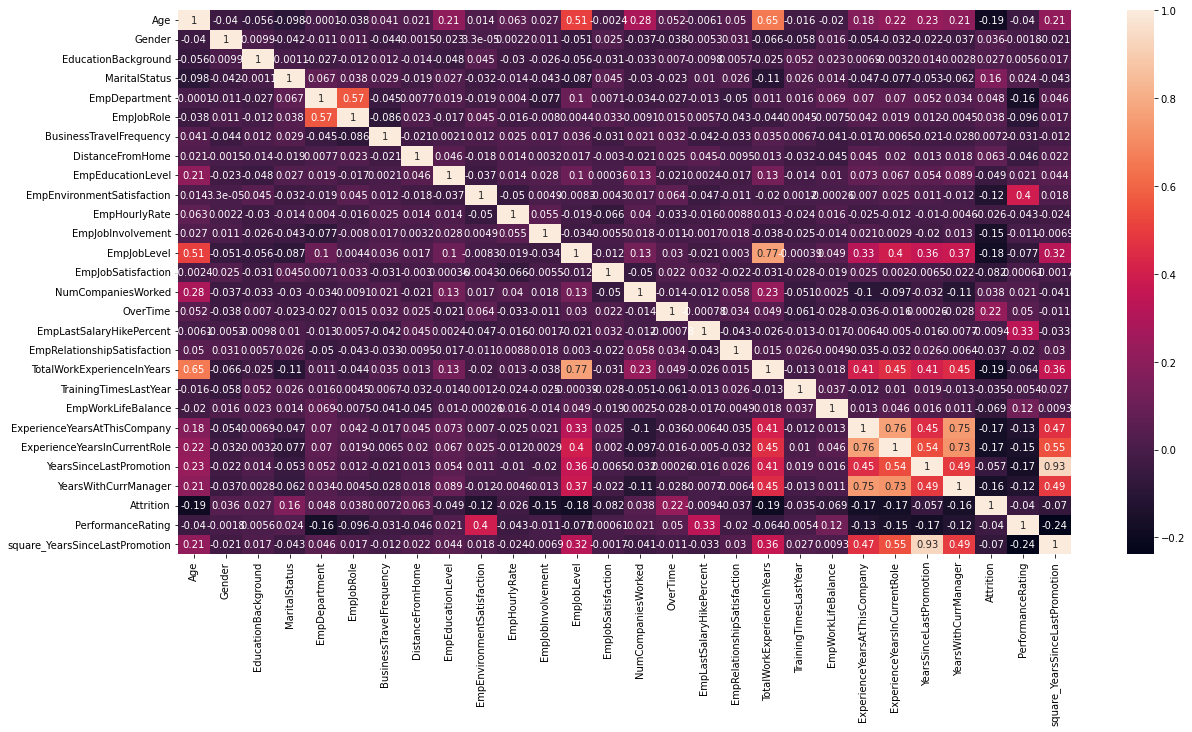

In [213]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [216]:
#rechecking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

NameError: name 'numerical_feature' is not defined

<Figure size 720x2880 with 0 Axes>

In [219]:
#droping unique feature and YearsSinceLastPromotion beacuse we have transformed this feature
df.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)

In [221]:
df.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                   -0.148321              -0.622235                   2   
1                    1.202479              -0.622235                   3   
2                    1.202479              -0.622235                   3   
3                    1.607719              -0.622235                   2   
4                   -0.148321              -1.414051                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                      0.868276                      0.749766   
1                      0.200371                      0.749766   
2                      2.649355                      2.410786   
3                     -0.244898                      0.472929   
4                     -0.912803                     -0.634417   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.100251          0                  3   
1              0.817773          0                  3   
2              2.230163          0                  4   
3              0.535296          0                  3   
4             -0.594616          0                  3   

   square_YearsSinceLastPromotion  
0                       -0.995673  
1                       -0.043007  
2                       -0.043007  
3                        2.304459  
4                        0.351600  

[5 rows x 27 columns]

In [223]:
df.shape

(1200, 27)

<AxesSubplot:>

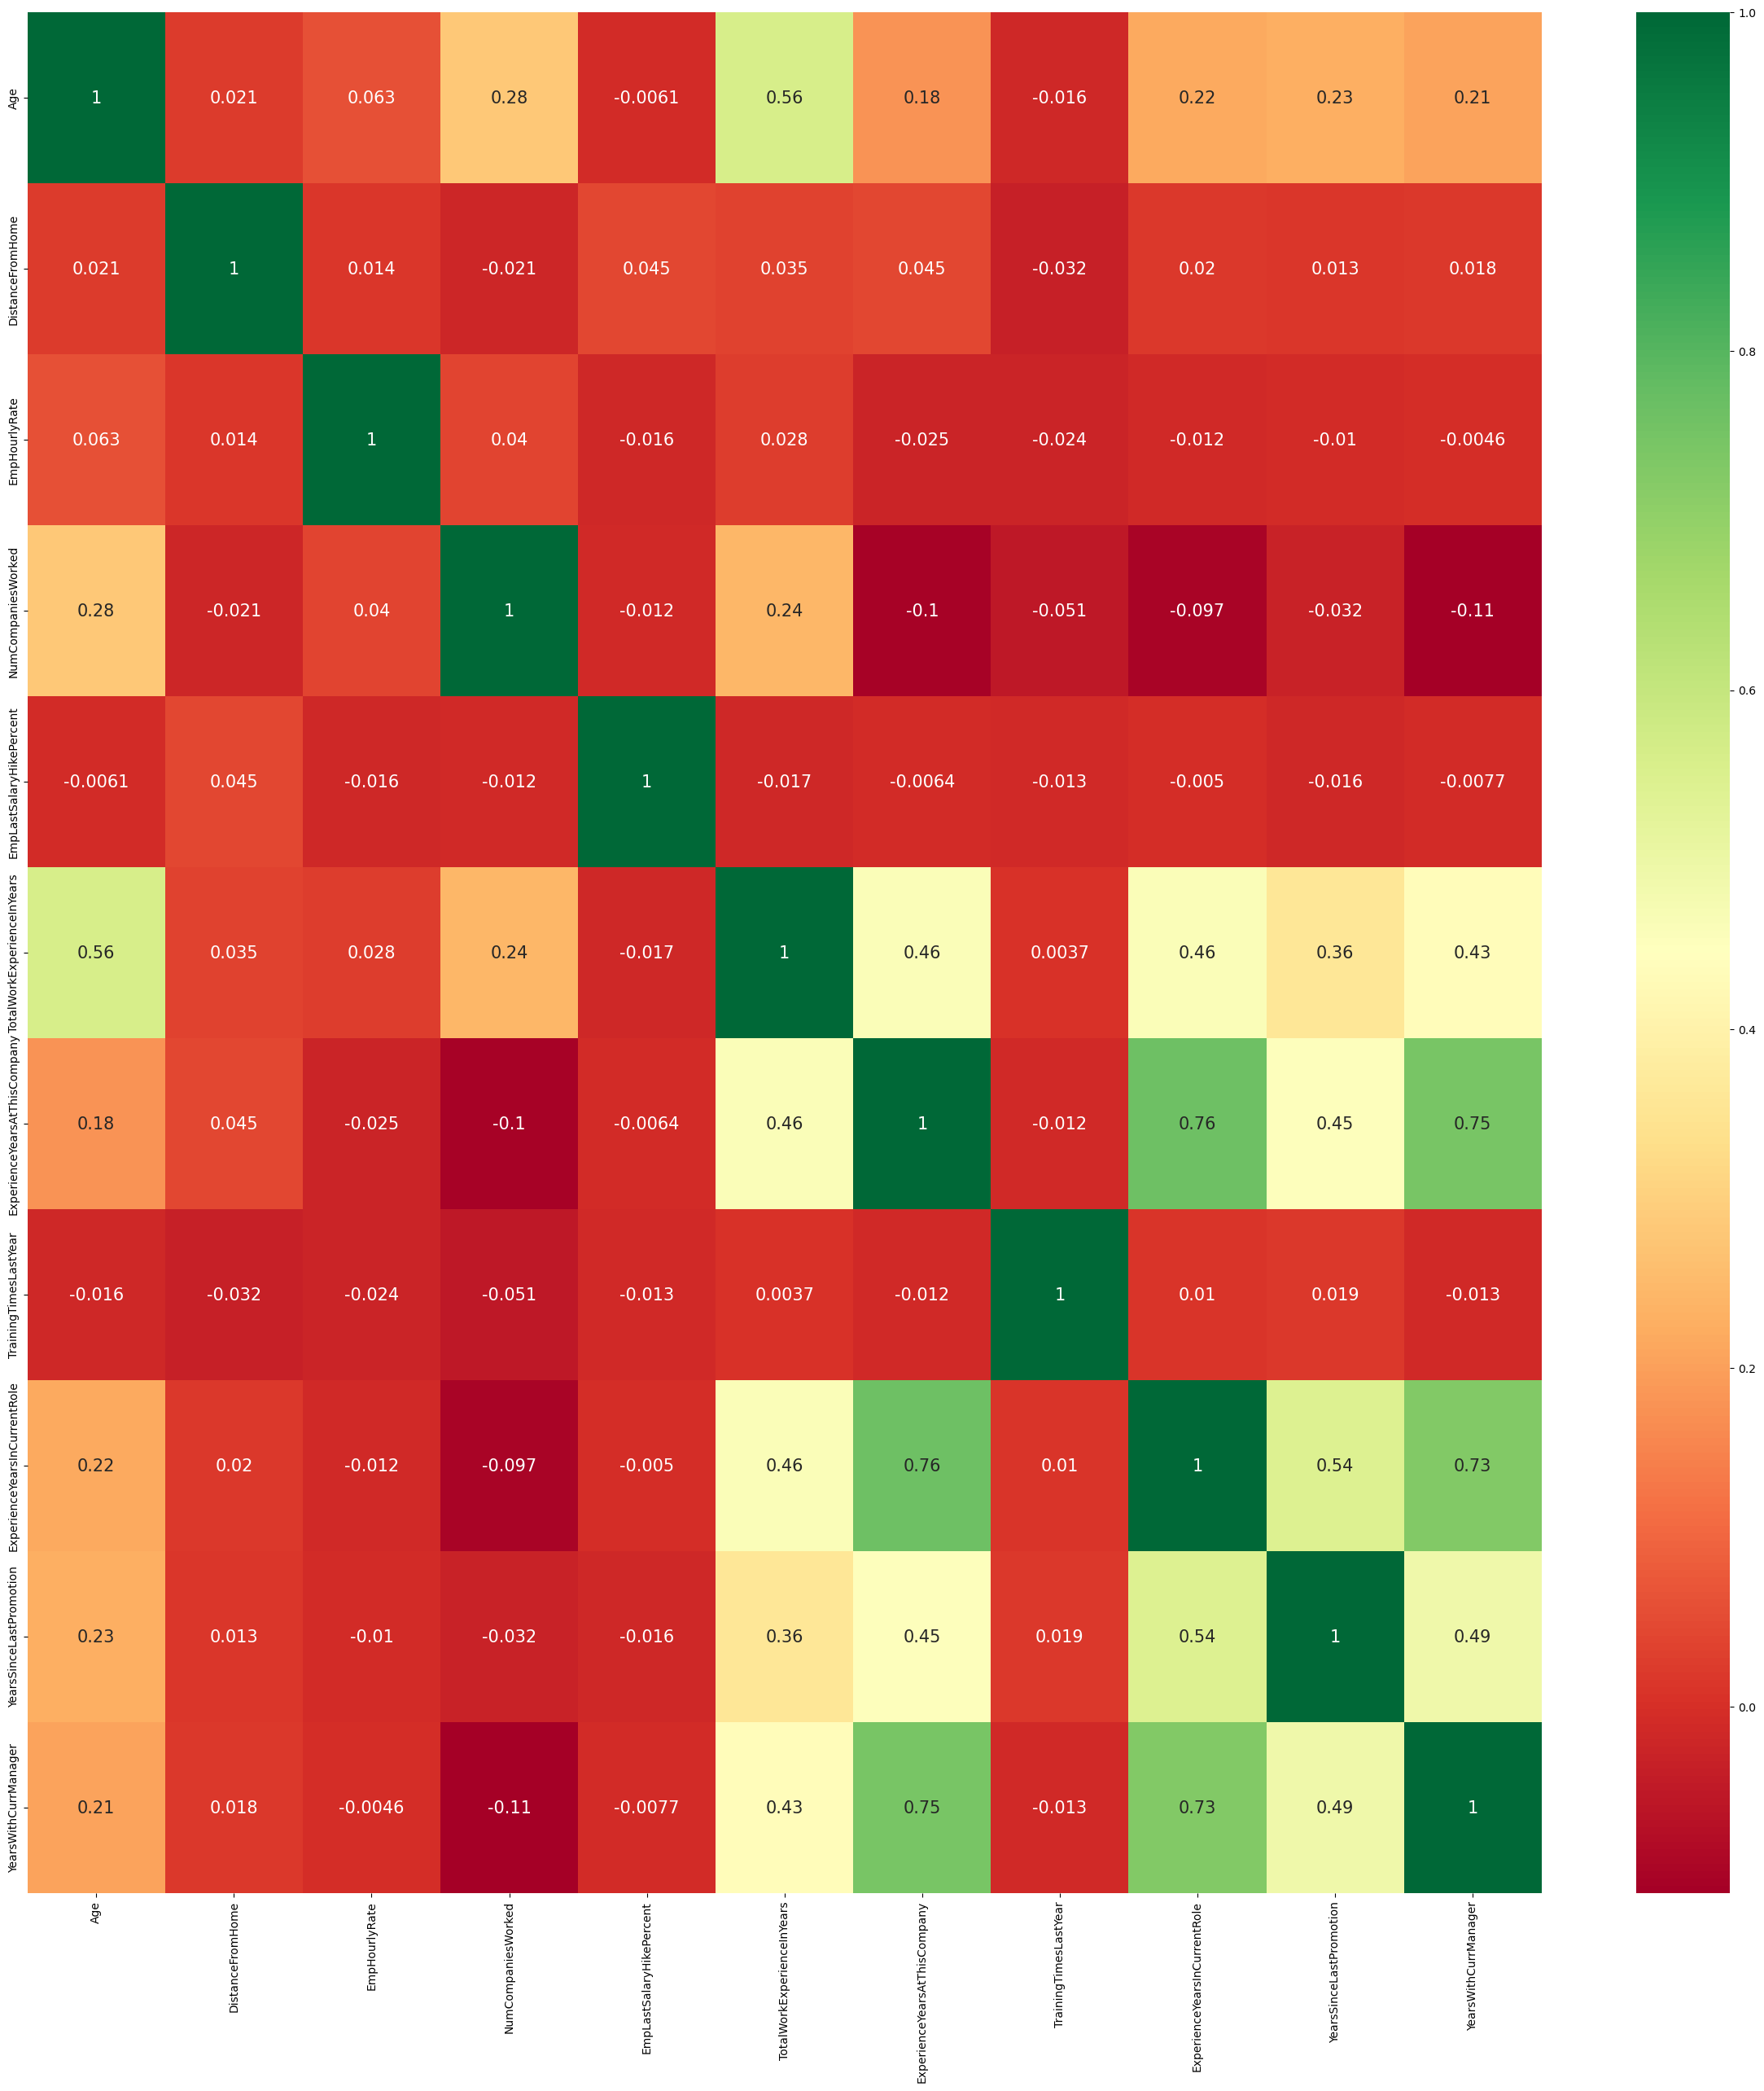

In [30]:
##NUMERIC COLUMNS
ds2=df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'ExperienceYearsAtThisCompany','TrainingTimesLastYear','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
      'YearsWithCurrManager']]

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(ds2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation']]

* Numeric are columns are not highly correlated with each other

**CHI-SQUARE(CATEGORICAL ATTRIBUTES)**

In [31]:
asd=df[['Gender', 'EducationBackground', 'MaritalStatus','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement',
        'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency','EmpJobLevel','EmpJobSatisfaction','OverTime',
       'EmpRelationshipSatisfaction','EmpWorkLifeBalance','Attrition']]
from sklearn.feature_selection import chi2
s=asd#categorical features
y=df["PerformanceRating"]#target feature

In [32]:
chis=chi2(s,y)#applying
chis

(array([6.45010450e-02, 1.51940780e-01, 1.23201098e+00, 3.14038417e-01,
        1.10691319e+02, 2.22075746e-01, 4.67870100e+01, 3.58961669e+01,
        9.98397489e-02, 6.27026259e+00, 1.08309855e-01, 7.96352956e+00,
        3.58014315e-01, 3.87650557e+00, 2.18630453e+00]),
 array([9.68263980e-01, 9.26843650e-01, 5.40097559e-01, 8.54687641e-01,
        9.19783224e-25, 8.94904855e-01, 6.92356641e-11, 1.60415528e-08,
        9.51305645e-01, 4.34940429e-02, 9.47285335e-01, 1.86526924e-02,
        8.36099915e-01, 1.43955251e-01, 3.35158320e-01]))

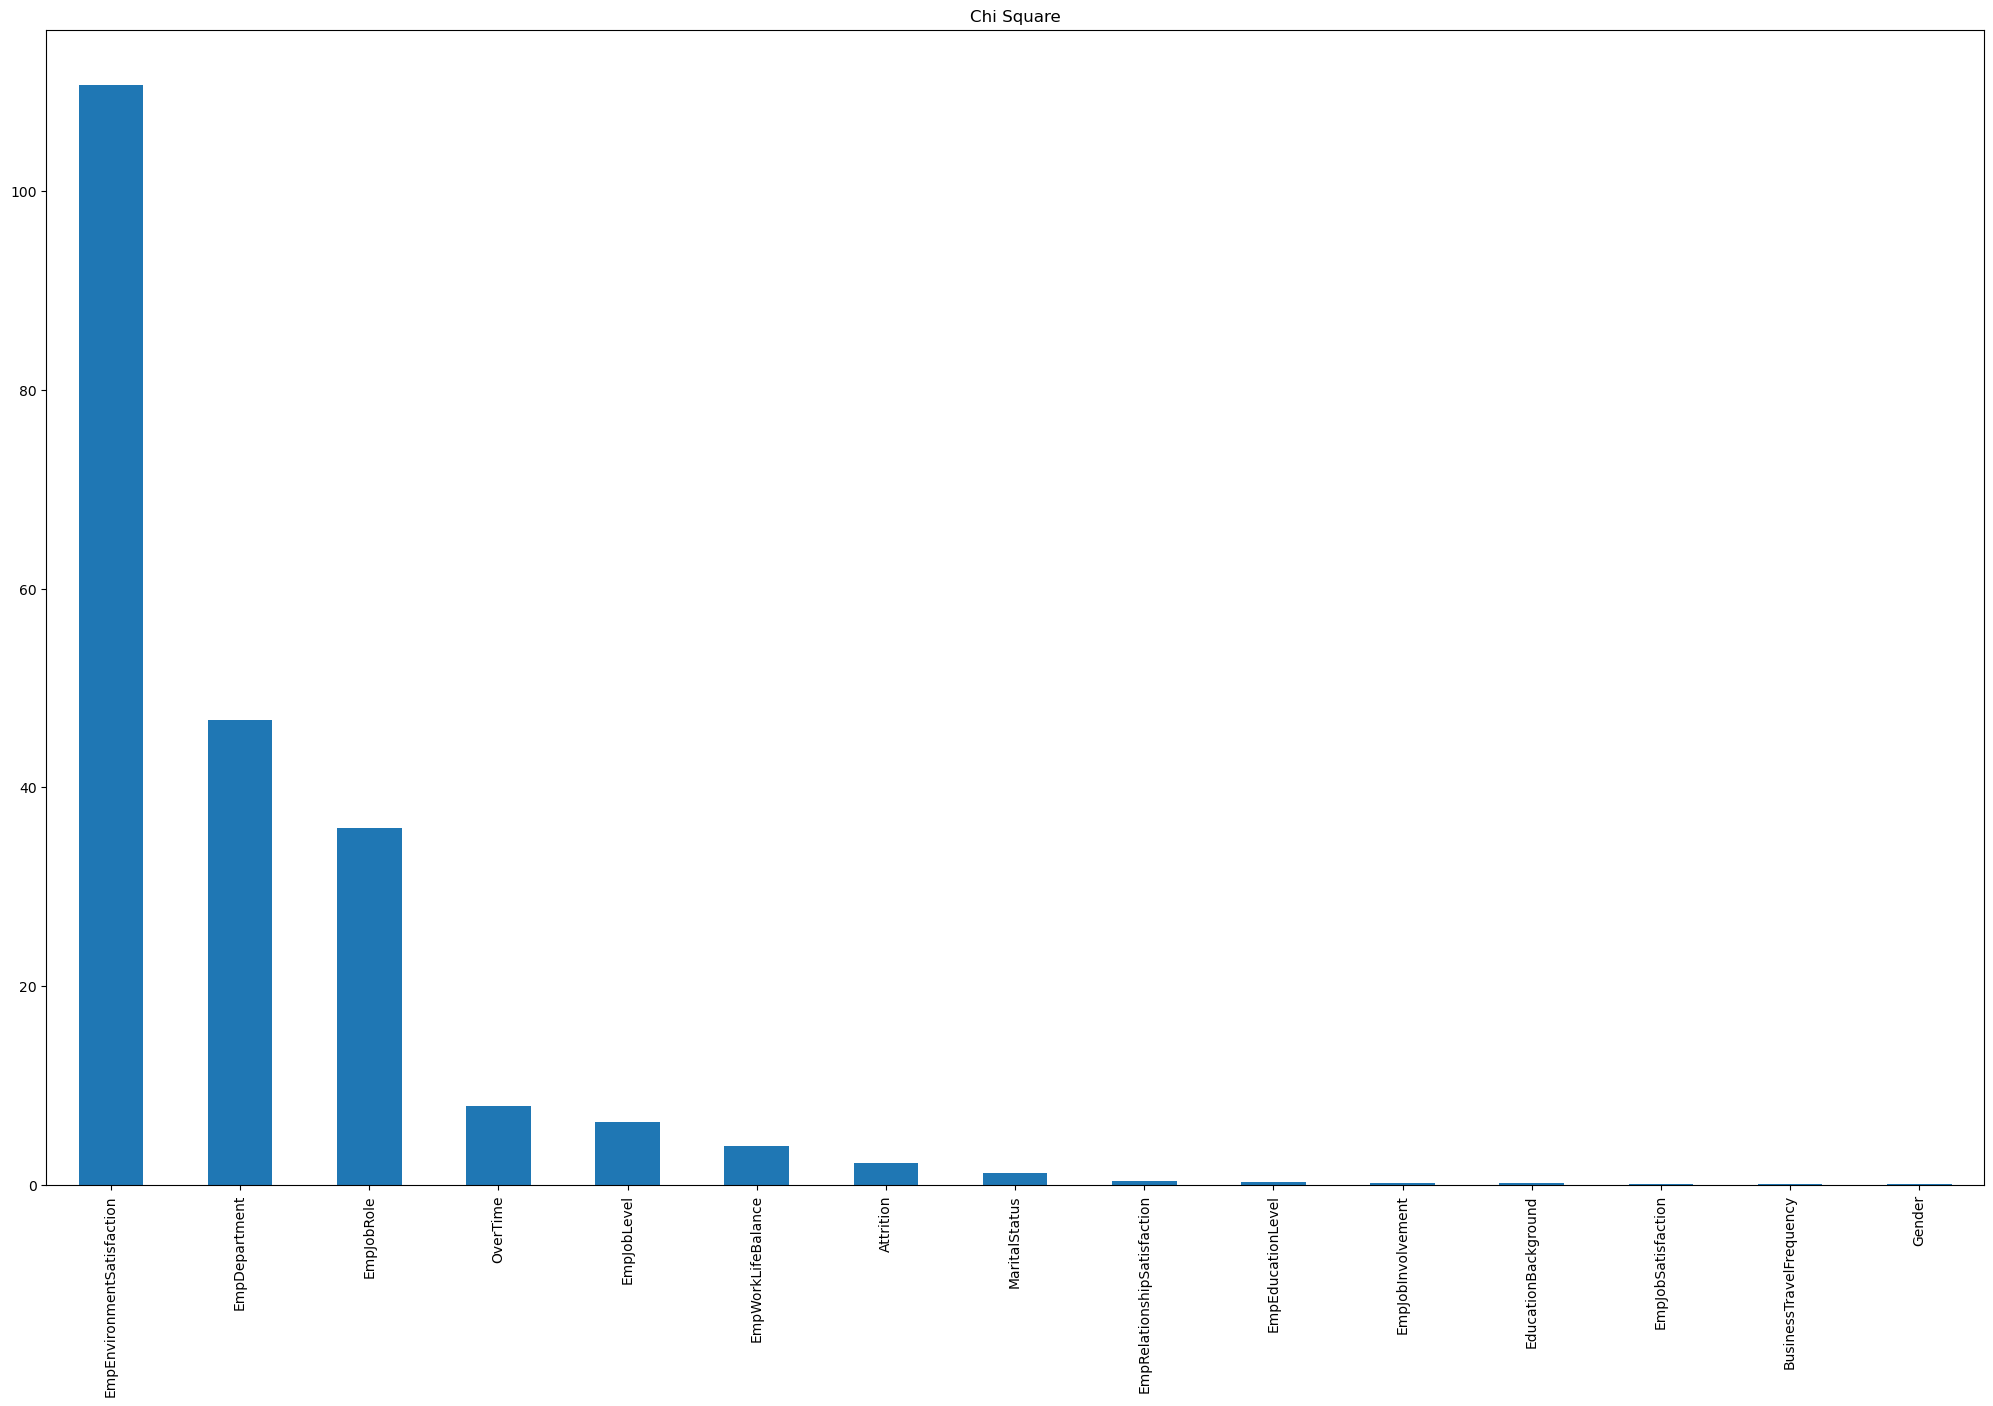

In [33]:
#Higher the chi value,higher the importance
plt.figure(figsize=(25,15))
chiv=pd.Series(chis[0],index=asd.columns)
chiv.sort_values(ascending=False,inplace=True)
plt.title("Chi Square")
chiv.plot.bar()
plt.show()

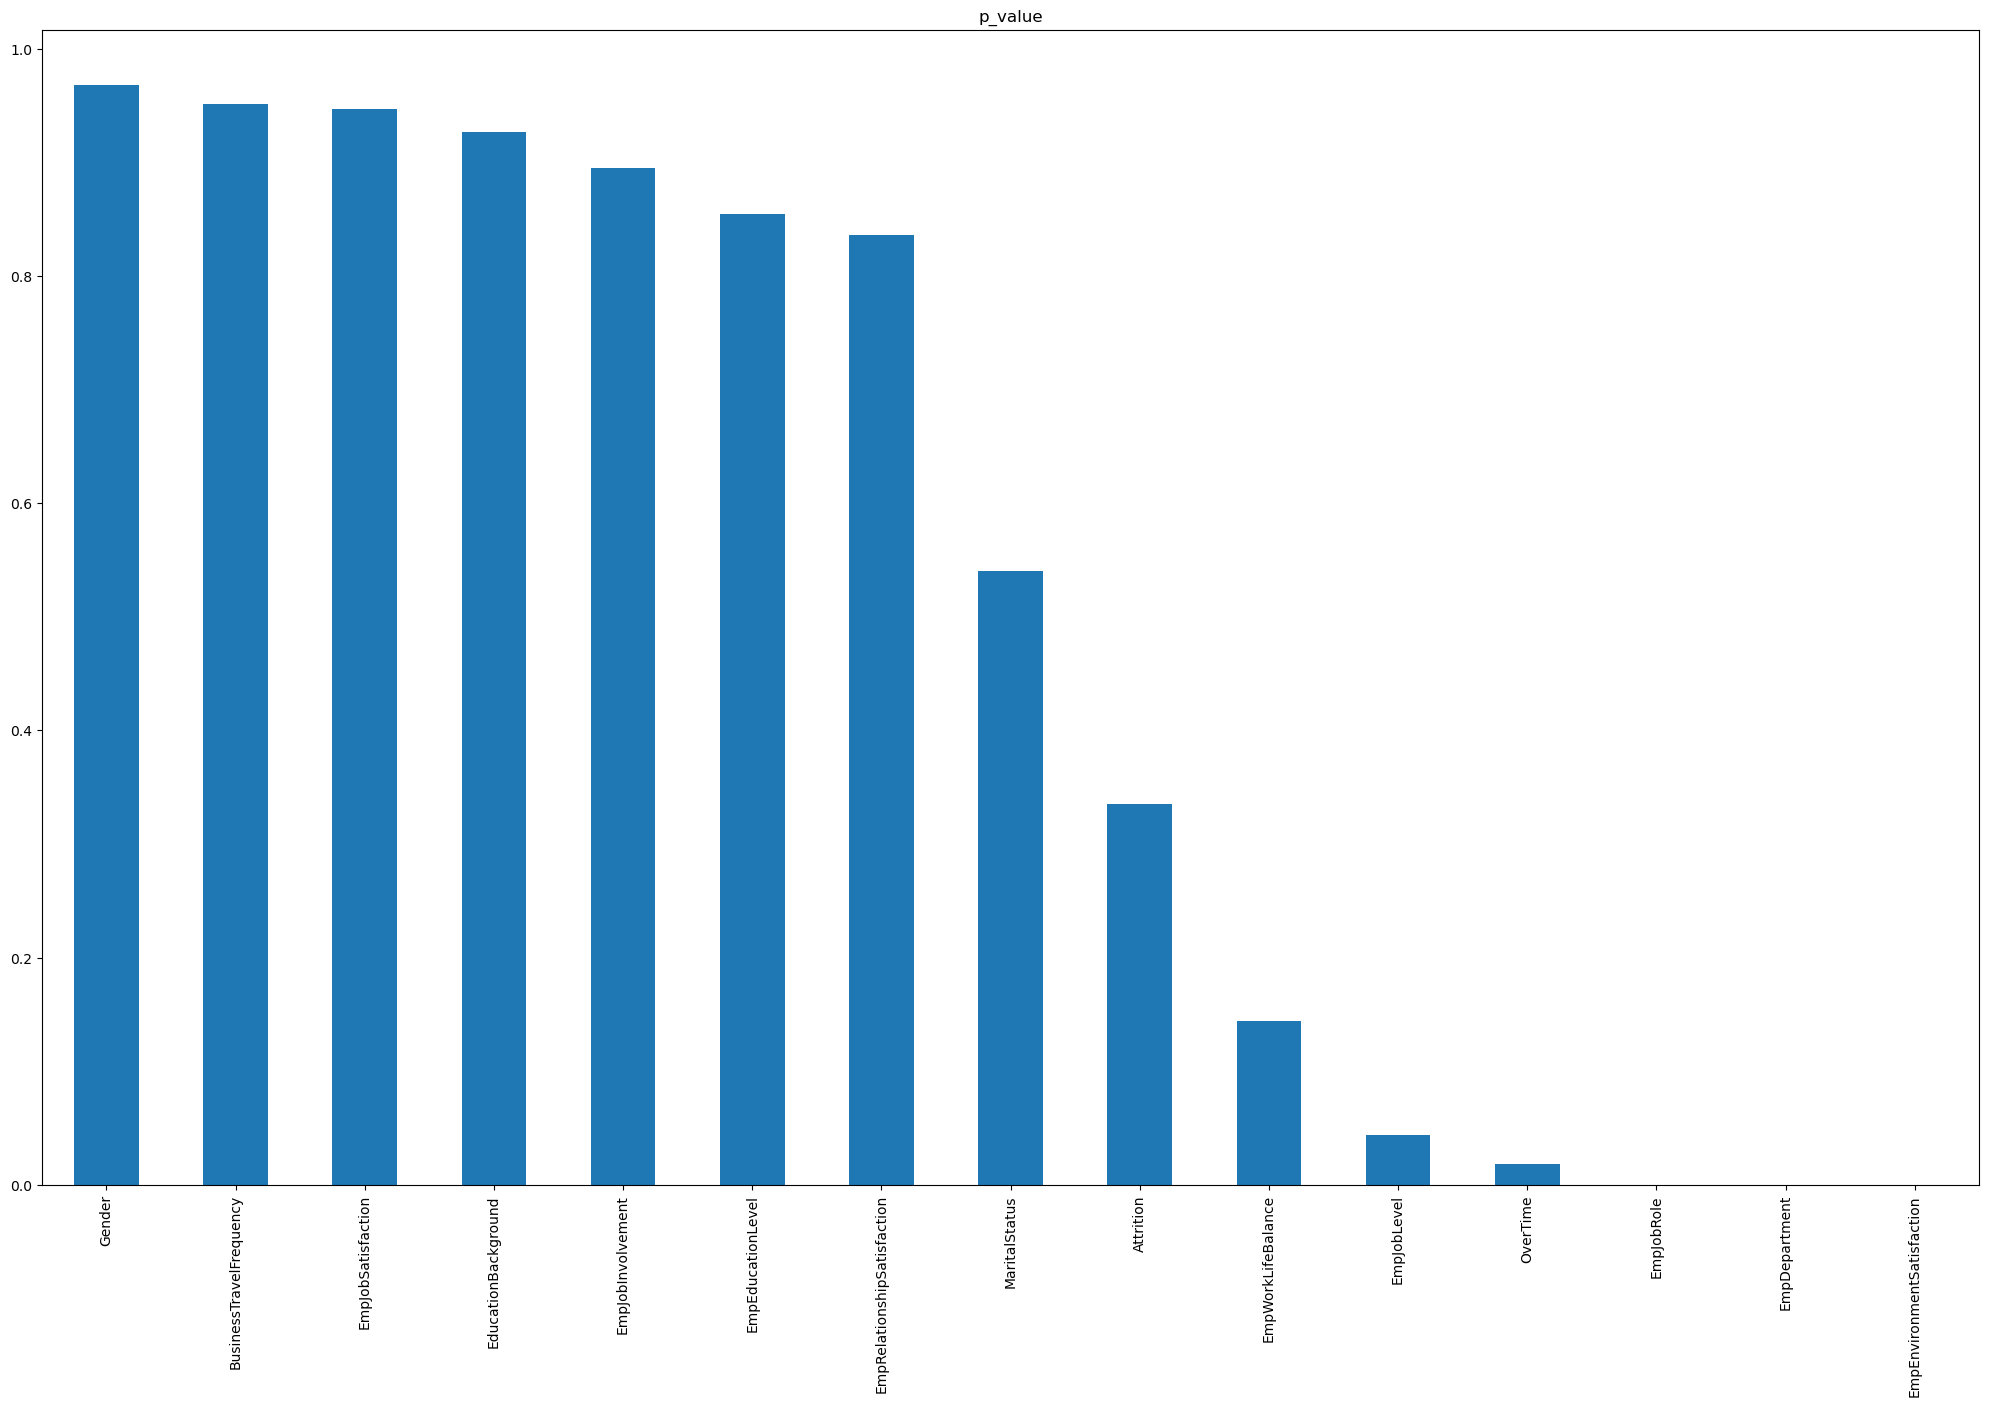

In [34]:
#Higher the p value,lower the importance
plt.figure(figsize=(25,15))
p_values=pd.Series(chis[1],index=asd.columns)
p_values.sort_values(ascending=False,inplace=True)
plt.title("p_value")
p_values.plot.bar()
plt.show()

In [35]:
# Lets remove the columns with low chi square score

In [ ]:
df.drop(["EmpNumber","Gender","BusinessTravelFrequency","EducationBackground","EmpEducationLevel","EmpJobInvolvement",
         "EmpRelationshipSatisfaction","MaritalStatus","Attrition"],axis=1,inplace=True)
#except job satisfaction column rest of  of columns that have low chi square score is removing..
#job satisfaction is an important feature in this list 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   EmpDepartment                 1200 non-null   int32
 2   EmpJobRole                    1200 non-null   int32
 3   DistanceFromHome              1200 non-null   int64
 4   EmpEnvironmentSatisfaction    1200 non-null   int64
 5   EmpHourlyRate                 1200 non-null   int64
 6   EmpJobLevel                   1200 non-null   int64
 7   EmpJobSatisfaction            1200 non-null   int64
 8   NumCompaniesWorked            1200 non-null   int64
 9   OverTime                      1200 non-null   int64
 10  EmpLastSalaryHikePercent      1200 non-null   int64
 11  TotalWorkExperienceInYears    1200 non-null   int64
 12  TrainingTimesLastYear         1200 non-null   int64
 13  EmpWorkLifeBalance            120

In [38]:
 # already checked for contant columns #std=0

**MODEL CREATION ,FINDING TOP 3 IMPORTANCE FEATURES**

In [53]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
#tuning catboost paaramters using gridsearch CV
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'xgboost'

**Model Building**
split data into train & test part
we will take 23% of the data for testing

In [57]:
X = df.loc[:, df.columns != 'PerformanceRating']
y = df.PerformanceRating

NameError: name 'df' is not defined

**Data Normilization(Minmax slacer)**

Min Max scaler is sclaing technique that scales all the data features in the range [0, 1]